# Putting the `ggplot` lens on: ordinary data visualization with `ggplot2`

### Please see this before you proceed:
+ 이번 시간에는 지난 시간에 만들었던 플라스틱 자료를 우선적으로 이용합니다. 자료를 삭제했다면 다시 내려받으시기를 권합니다.

In [1]:
library(tidyverse)
library(ggrepel)
#options(jupyter.plot_mimetypes = "image/png",
#        repr.plot.width = 8, 
#        repr.plot.height = 7.2)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


## 1. Prequel: visualization with plain R

+ `plot`을 항상 기억하십시오.
    + `ggplot`을 설치할 수 없거나, 단순한 시각화를 선호한다면, R 기본 시각화 방법은 많은 도움이 될 것입니다.
    + `plot` 함수의 기본적 용법은 아래와 같습니다. 기본적으로 `plot` 함수는 2차원 그래프를 그리는 데 이용됩니다.
    + 3차원의 정보에 대한 시각화는 이번 시간에 다루지 않습니다. 관심이 있는 분은 `rgl`이나 `plot3D` 패키지를 참고하세요.
+ `plot`에 더할 수 있는 요소들
    + `add` 인수로 이미 표시된 그래프에 그래프 요소를 추가할 수 있습니다.
    + `add`를 사용하지 않는다면, `points`, `lines` 등의 함수들을 이용해서 기하 요소들을 추가할 수 있습니다.
        + `points`: 이미 만들어진 plot이 있을 때, 점들을 추가하는 함수입니다.
        + `lines`: 이미 만들어진 plot이 있을 때, 선들을 추가하는 함수입니다.
        + `abline`: 일차함수 또는 수직/수평선을 그을 수 있는 함수입니다.
        + `curve`: 곡선을 그릴 수 있는 함수입니다.
+ 폐플라스틱 교역 자료를 이용해 봅시다.

In [2]:
?plot

plot {graphics},R Documentation
x,"the coordinates of points in the plot. Alternatively, a single plotting structure, function or any R object with a plot method can be provided."
y,"the y coordinates of points in the plot, optional if x is an appropriate structure."
...,"Arguments to be passed to methods, such as graphical parameters (see par). Many methods will accept the following arguments: typewhat type of plot should be drawn. Possible types are ""p"" for points, ""l"" for lines, ""b"" for both, ""c"" for the lines part alone of ""b"", ""o"" for both ‘overplotted’, ""h"" for ‘histogram’ like (or ‘high-density’) vertical lines, ""s"" for stair steps, ""S"" for other steps, see ‘Details’ below, ""n"" for no plotting. All other types give a warning or an error; using, e.g., type = ""punkte"" being equivalent to type = ""p"" for S compatibility. Note that some methods, e.g. plot.factor, do not accept this. mainan overall title for the plot: see title. suba sub title for the plot: see title. xlaba title for the x axis: see title. ylaba title for the y axis: see title. aspthe y/x aspect ratio, see plot.window."


In [3]:
# read_csv
pla <- readr::read_csv(file = 'C:/Users/sigma/Dropbox/Chores/2018S/GeoCONDA/W1/Plastic_trade.csv',
                       col_types = 'cccddicc')
head(pla)

Flow,Reporter,Partner,Netweight_kg,Value_usd,year,Reporter_nm,Partner_nm
Import,ALB,BGR,124190,107621,2010,ALBANIA,BULGARIA
Export,ALB,CHN,812861,425149,2010,ALBANIA,CHINA
Import,ALB,DEU,2347640,943464,2010,ALBANIA,GERMANY
Export,ALB,DEU,678160,349723,2010,ALBANIA,GERMANY
Import,ALB,GRC,1516306,647468,2010,ALBANIA,GREECE
Import,ALB,ITA,65626,29150,2010,ALBANIA,ITALY


+ 데이터 시각화를 본격적으로 시작하기에 앞서, 시각화를 위해 생각해보아야 할 데이터 전처리 방향을 간단히 이야기해 보겠습니다.
    + 시각화할 __현상과 값__을 생각합니다.
    + 시각화할 __방법__을 생각합니다.
        + 시간에 관련된 데이터 (시점, 간격, 순서, ...) 가 있는가?
            + 만약 시간이 중요하다면, 자료를 시간적 순서에 맞게 배치하는 것이 바람직합니다.
        + 공간에 관련된 데이터 (좌표, 지역코드, ...) 가 있는가?
            + 만약 공간이 중요하다면, 지도를 부가하거나 지도 위에 시각화 자료를 배치하는 방법을 생각할 수 있습니다.
            + 물론 실제로 구현하는 것은 시간 관련 데이터를 시각화하는 데 비해 훨씬 복잡합니다.
        + 표시하려는 데이터의 형(type)은 무엇인가?
            + `factor`의 경우, `levels`의 순서가 시각화에 중요한가?
                + 지난 주에 다루었던 'Ordered factor'를 상기해 보십시오.
                + 값의 순위(ranking)가 중요하다면?
        + 어떻게 시각화 결과를 구성할 것인가?
            + 자료들을 묶어낼 기준(범주)이 있는가?
                + 위의 '공간에 관련된 데이터'에서, 반드시 좌표나 경계같은 지리정보를 다루지 않더라도 지역에 따라 범주화하는 사례를 생각해볼 수 있습니다.
            + 시각적 요소들을 어떻게 배치, 배열할 것인가?
                + 각 요소의 크기
                + 부가적인 정보의 배치
                + 글꼴과 색상 등, 심미적인 요소 선택
    + 시각화의 __효율__을 생각합니다.
        + 전체 데이터가 너무 크다면, 시각화할 현상에 맞도록 __데이터를 추출하여 별도의 데이터셋을 만듭니다.__ 이 과정은 시각화에 걸리는 시간을 크게 줄여 줍니다.
        + 범주들이 너무 많다면, __범주들을 따로 떼어서(subsetting) 표시하거나, 높은 수준의 추상화 범주를 만들어서 범주의 개수를 줄이는__ 편이 합리적입니다.

![](https://i1.wp.com/www.tatvic.com/blog/wp-content/uploads/2016/12/Pic_2.png)    
_당연하게도, 위에 표시된 차트 종류를 모두 R에서 구현할 수 있습니다)_

#### 첫 번째 예시
+ 복습하는 차원에서, 지난 주 익혔던 여러 함수들을 이용해서 '2015년, 국가별 수출량과 수입량의 scatterplot'을 그리기 위한 데이터를 만들고, `plot` 함수를 이용해서 결과를 시각화해 보겠습니다.

In [4]:
## data munging
pla_sc <- pla %>% 
    group_by(Reporter, Flow, year) %>%
    summarize(totval = sum(Value_usd)) %>%
    ungroup %>%
    spread(key = Flow, value = totval)
pla_sc15 <- pla_sc %>%
    filter(year == 2015)

head(pla_sc)
head(pla_sc15)

Reporter,year,Export,Import,Re-Export,Re-Import
ABW,2010,NA,1531,NA,NA
ABW,2011,NA,17,NA,NA
ABW,2012,NA,187,NA,NA
ABW,2013,NA,11,NA,NA
ABW,2016,NA,55,NA,NA
AGO,2010,NA,196373,NA,NA


Reporter,year,Export,Import,Re-Export,Re-Import
AGO,2015,NA,277359,NA,NA
ALB,2015,1116514,24936,NA,NA
ARE,2015,10846853,4045305,427299,NA
ARG,2015,4480049,NA,NA,NA
ARM,2015,36311,3498,NA,NA
ATG,2015,16519,NA,37,NA


In [5]:
library(rvest)
isocountry <- read_html('https://en.wikipedia.org/wiki/ISO_3166-1#Officially_assigned_code_elements') %>% 
    html_table(fill = TRUE)
isocountry <- isocountry[[2]]

regions <- read_html('https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)') %>% 
    html_table(fill = TRUE)
regions <- regions[[3]]

head(isocountry)
head(regions)

Loading required package: xml2

Attaching package: 'rvest'

The following object is masked from 'package:purrr':

    pluck

The following object is masked from 'package:readr':

    guess_encoding



English short name (upper/lower case),Alpha-2 code,Alpha-3 code,Numeric code,Link to ISO 3166-2 subdivision codes,Independent
Afghanistan,AF,AFG,4,ISO 3166-2:AF,Yes
Åland Islands,AX,ALA,248,ISO 3166-2:AX,No
Albania,AL,ALB,8,ISO 3166-2:AL,Yes
Algeria,DZ,DZA,12,ISO 3166-2:DZ,Yes
American Samoa,AS,ASM,16,ISO 3166-2:AS,No
Andorra,AD,AND,20,ISO 3166-2:AD,Yes


Rank,Country or area,UN continentalregion[2],UN statisticalregion[2],Population(1 July 2016)[3],Population(1 July 2017)[3],Change
—,World,—,—,"7,466,964,280","7,550,262,101",+1.1%
1,China[a],Asia,Eastern Asia,"1,403,500,365","1,409,517,397",+0.4%
2,India,Asia,Southern Asia,"1,324,171,354","1,339,180,127",+1.1%
3,United States,Americas,Northern America,"322,179,605","324,459,463",+0.7%
4,Indonesia,Asia,South-eastern Asia,"261,115,456","263,991,379",+1.1%
5,Brazil,Americas,South America,"207,652,865","209,288,278",+0.8%


In [6]:
isocountry <- isocountry# %>%
colnames(isocountry)[c(1,3)] <- c('country', 'isocode')
    #dplyr::rename(country = `English short name (upper/lower case)`,
    #       isocode = `Alpha-3 code`) %>%
isocountry <- isocountry %>%
    dplyr::select(country, isocode)
regions <- regions %>%
    mutate(country = stringr::str_replace(`Country or area`, '\\[.\\]', '')) %>%
    dplyr::rename(UNSR = `UN statisticalregion[2]`) %>%
    dplyr::select(country, UNSR)
iso <- full_join(isocountry, regions)
summary(iso)
head(iso)
iso %>% filter(is.na(UNSR))
iso %>% filter(is.na(UNSR)) %>% dim
write.csv(iso, 'D:/ISO_Country_180712.csv', row.names = FALSE, fileEncoding = 'UTF-8')

Joining, by = "country"


   country            isocode              UNSR          
 Length:282         Length:282         Length:282        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  

country,isocode,UNSR
Afghanistan,AFG,Southern Asia
Åland Islands,ALA,NA
Albania,ALB,Southern Europe
Algeria,DZA,Northern Africa
American Samoa,ASM,Polynesia
Andorra,AND,Southern Europe


country,isocode,UNSR
Åland Islands,ALA,NA
Antarctica,ATA,NA
Bolivia (Plurinational State of),BOL,NA
"Bonaire, Sint Eustatius and Saba",BES,NA
Bouvet Island,BVT,NA
British Indian Ocean Territory,IOT,NA
Brunei Darussalam,BRN,NA
Cabo Verde,CPV,NA
Christmas Island,CXR,NA
Cocos (Keeling) Islands,CCK,NA


[1] 48  3

- 위 두 코드 블럭들은 HTML 문서에서 테이블을 가져와서 일부 데이터를 정리하는 과정을 담은 블록입니다만, 결과물이 '즉시 투입할 수 있는' 형태가 아니어서 부득이하게 약간의 수작업을 거쳤습니다. 아래 코드 블럭은 수작업이 끝난 데이터를 불러오는 역할을 합니다.

In [7]:
iso_clear <- read_csv('C:/Users/sigma/Dropbox/Chores/2018S/GeoCONDA/W2/Countries.csv', locale = locale(encoding = 'UTF-8'))

Parsed with column specification:
cols(
  country = col_character(),
  isocode = col_character(),
  UNSR = col_character()
)


In [8]:
iso_clear %>% head
pla_sc <- pla_sc %>% left_join(iso_clear, by = c('Reporter' = 'isocode'))
pla_sc15 <- pla_sc15 %>% left_join(iso_clear, by = c('Reporter' = 'isocode'))

country,isocode,UNSR
Afghanistan,AFG,Southern Asia
Åland Islands,ALA,Eastern Europe
Albania,ALB,Southern Europe
Algeria,DZA,Northern Africa
American Samoa,ASM,Polynesia
Andorra,AND,Southern Europe


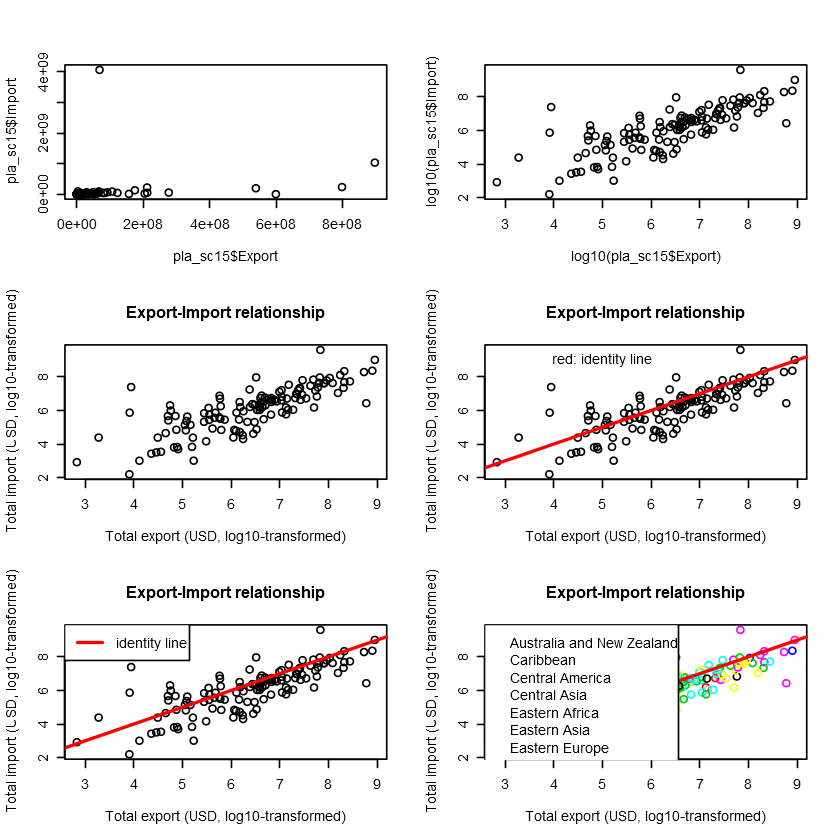

In [9]:
# Graphical interface adjustment: three rows, two columns; six plots in total would be visualized
par(mfrow = c(3,2))

# direct plotting: too clustered in small values
plot(x = pla_sc15$Export, y = pla_sc15$Import)

# log10-transformed: looks better
plot(x = log10(pla_sc15$Export), y = log10(pla_sc15$Import))

# updating axis titles
plot(x = log10(pla_sc15$Export), y = log10(pla_sc15$Import),
     xlab = 'Total export (USD, log10-transformed)',
     ylab = 'Total import (USD, log10-transformed)',
     main = 'Export-Import relationship')

# adding identity line
plot(x = log10(pla_sc15$Export), y = log10(pla_sc15$Import),
     xlab = 'Total export (USD, log10-transformed)',
     ylab = 'Total import (USD, log10-transformed)',
     main = 'Export-Import relationship')
abline(a = 0, b = 1, col = 'red', lwd = 2)
text(5, 9, 'red: identity line')

plot(x = log10(pla_sc15$Export), y = log10(pla_sc15$Import),
     xlab = 'Total export (USD, log10-transformed)',
     ylab = 'Total import (USD, log10-transformed)',
     main = 'Export-Import relationship')
abline(a = 0, b = 1, col = 'red', lwd = 2)
legend('topleft', col = 'red', lwd = 2, legend = 'identity line')

plot(x = log10(pla_sc15$Export), y = log10(pla_sc15$Import),
     xlab = 'Total export (USD, log10-transformed)',
     ylab = 'Total import (USD, log10-transformed)',
     main = 'Export-Import relationship',
     col = factor(pla_sc15$UNSR))
abline(a = 0, b = 1, col = 'red', lwd = 2)
legend('topleft', 
       col = 1:22, 
       legend = levels(factor(pla_sc15$UNSR)))

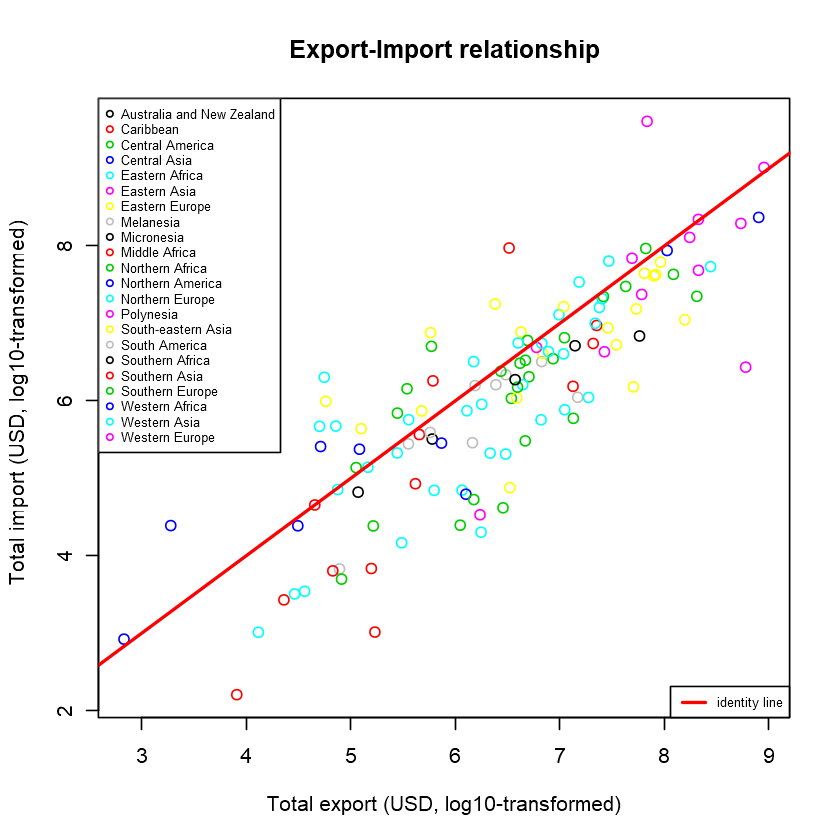

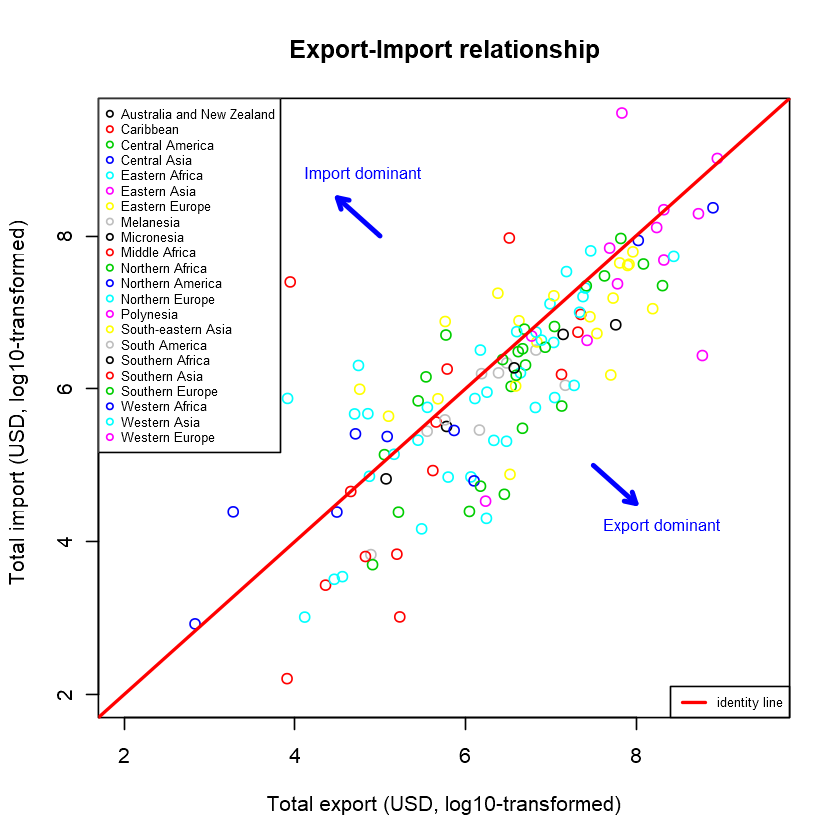

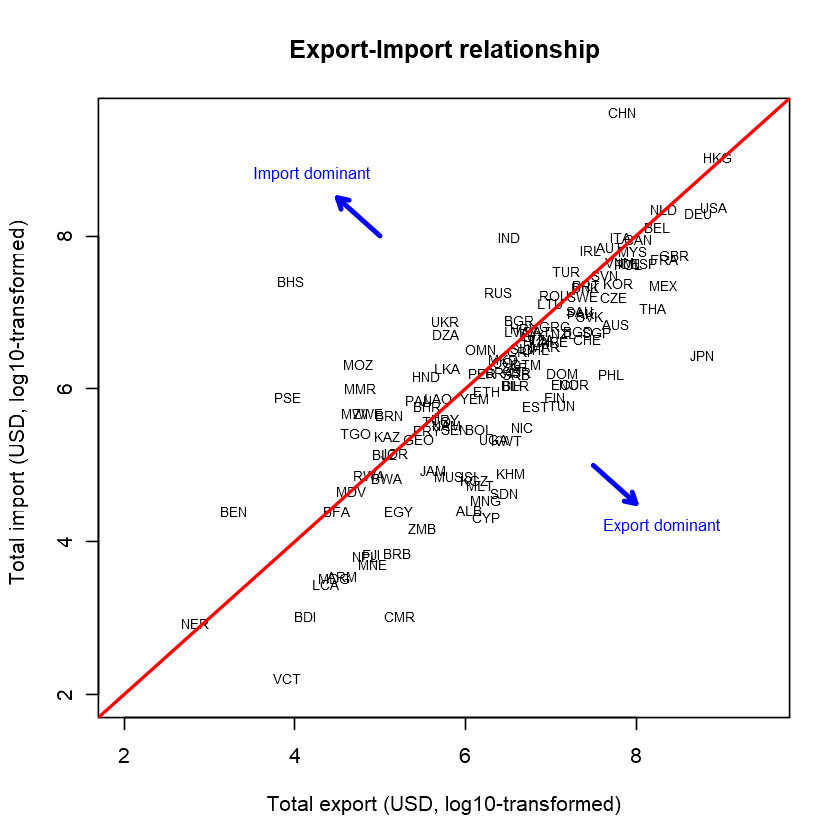

In [10]:
## Too packed... let's place it again
par(mfrow = c(1,1))
plot(x = log10(pla_sc15$Export), y = log10(pla_sc15$Import),
     xlab = 'Total export (USD, log10-transformed)',
     ylab = 'Total import (USD, log10-transformed)',
     main = 'Export-Import relationship',
     col = factor(pla_sc15$UNSR))
abline(a = 0, b = 1, col = 'red', lwd = 2)
legend('topleft', 
       col = 1:22,#factor(pla_sc15$UNSR), 
       pch = 1,
       cex = 0.6,
       legend = levels(factor(pla_sc15$UNSR)))
legend('bottomright', col = 'red', lwd = 2, 
       legend = 'identity line', cex = 0.6)


# to add graphical element
plot(x = log10(pla_sc15$Export), y = log10(pla_sc15$Import),
     xlab = 'Total export (USD, log10-transformed)',
     ylab = 'Total import (USD, log10-transformed)',
     main = 'Export-Import relationship',
     col = factor(pla_sc15$UNSR),
     xlim = c(2, 9.5), 
     ylim = c(2, 9.5))
abline(a = 0, b = 1, col = 'red', lwd = 2)

text(x = 4.8, y = 8.8, cex = 0.8, labels = 'Import dominant', col = 'blue')
text(x = 8.3, y = 4.2, cex = 0.8, labels = 'Export dominant', col = 'blue')
arrows(x0 = 5, y0 = 8, x1 = 4.5, y1 = 8.5, col = 'blue', length = 0.1, lwd = 3)
arrows(x0 = 7.5, y0 = 5, x1 = 8, y1 = 4.5, col = 'blue', length = 0.1, lwd = 3)

legend('topleft', 
       col = 1:22, 
       pch = 1,
       cex = 0.6,
       legend = levels(factor(pla_sc15$UNSR)))
legend('bottomright', col = 'red', lwd = 2, 
       legend = 'identity line', cex = 0.6)



## Let's replace ISO country codes at point locations
plot(x = log10(pla_sc15$Export), y = log10(pla_sc15$Import),
     xlab = 'Total export (USD, log10-transformed)',
     ylab = 'Total import (USD, log10-transformed)',
     main = 'Export-Import relationship',
     type = 'n',
     xlim = c(2, 9.5), ylim = c(2, 9.5))
text(x = log10(pla_sc15$Export), y = log10(pla_sc15$Import),
     labels = pla_sc15$Reporter, 
     cex = 0.66)
abline(a = 0, b = 1, col = 'red', lwd = 2)

text(x = 4.2, y = 8.8, cex = 0.8, labels = 'Import dominant', col = 'blue')
text(x = 8.3, y = 4.2, cex = 0.8, labels = 'Export dominant', col = 'blue')
arrows(x0 = 5, y0 = 8, x1 = 4.5, y1 = 8.5, col = 'blue', length = 0.1, lwd = 3)
arrows(x0 = 7.5, y0 = 5, x1 = 8, y1 = 4.5, col = 'blue', length = 0.1, lwd = 3)

### Line-by-line code analysis

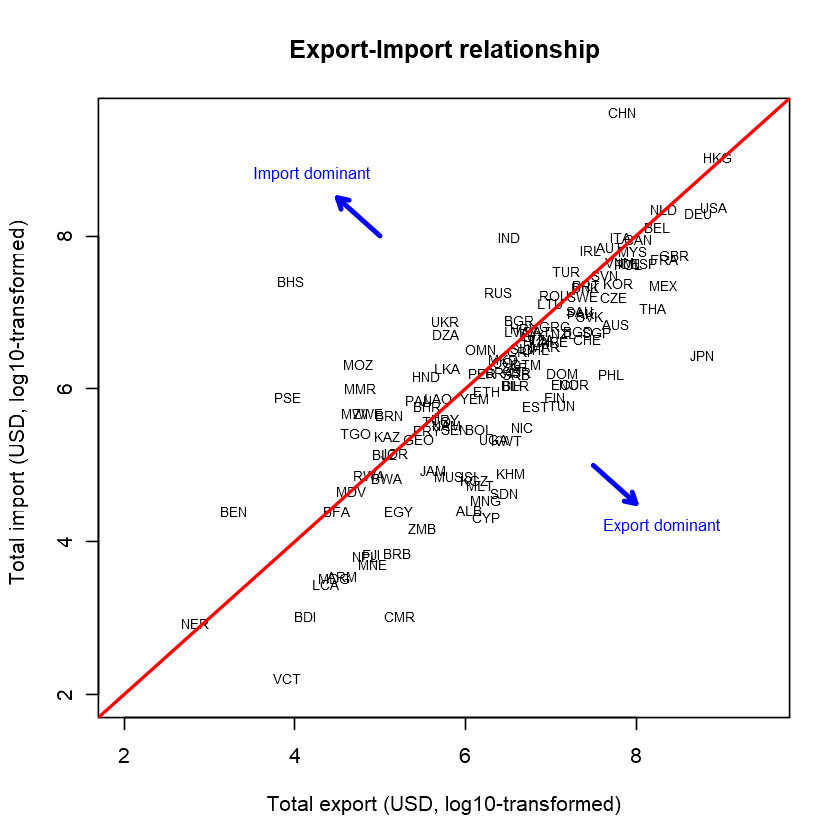

In [11]:
# Main plot
plot(x = log10(pla_sc15$Export), y = log10(pla_sc15$Import), #1
     xlab = 'Total export (USD, log10-transformed)', #2
     ylab = 'Total import (USD, log10-transformed)', #3
     main = 'Export-Import relationship', #4
     type = 'n', #5
     xlim = c(2, 9.5), ylim = c(2, 9.5)) #6
text(labels = pla_sc15$Reporter, #7
     x = log10(pla_sc15$Export), y = log10(pla_sc15$Import), #8
     cex = 0.66) #9
abline(a = 0, b = 1, col = 'red', lwd = 2) #10

arrows(x0 = 5, y0 = 8, #11
       x1 = 4.5, y1 = 8.5, #12 
       col = 'blue', length = 0.1, lwd = 3) #13
arrows(x0 = 7.5, y0 = 5, #14
       x1 = 8, y1 = 4.5, #15
       col = 'blue', length = 0.1, lwd = 3) #16
text(labels = 'Import dominant', #17
     x = 4.2, y = 8.8,  #18
     cex = 0.8, col = 'blue') #19
text(labels = 'Export dominant', #20
     x = 8.3, y = 4.2, #21
     cex = 0.8, col = 'blue') #22


+ __참고__
    + 줄 번호는 각 줄 오른쪽의 comment 처리된 번호에 준합니다.
    + 위 코드는 다음의 원칙에 따라 작성되었습니다.
        + 우선순위: 표시대상-좌표-제목 관련 사항-기타 시각요소(색상, 크기)-세부조정사항
        + `text` 함수와 같이 표시할 대상이 중요한 경우에는 좌표보다 표시할 내용을 우선시 하였습니다.
        + 좌표 관련 인수들은 되도록 한 줄에 묶어서 할당합니다.
        + 실제 코딩에서는 모든 인수들을 별도의 줄에 표시하도록 하는 것이 좋습니다.
    
+ Lines 1 to 6: 기본 `plot`
    + `x`, `y`: x and y coordinates
    + `xlab`, `ylab`: x- and y-axis labels
    + `main`: plot title
    + `type`: 
        + `p`: points
        + `l`: lines
        + `b`: both `p` and `l`
        + `n`: no plotting; but preserves dimensionwise data values to plot
    + `xlim`, `ylim`: x- and y- axis range
    
+ Lines 7 to 9: 추가요소 1 - 국가명 레이블
    + 국가가 식별될 수 있도록 데이터를 점으로 표시하는 대신 ISO Alpha-3 code로 나타내도록 합니다.
    + `labels`: text to be visualized at corresponding point locations
    + `x` and `y`: x- and y- coordinates at which labels are to be posited
    + `cex`: relative size of labels (or points)
    
+ Lines 10: 추가요소 2 - identity line (abline: a+bx)
    + `a`: intercept
    + `b`: slope
    + `col`: line color
    + `lwd`: line width
    + `lty`: line type (1: solid; 2: dash, ...)
    
(아래 요소는 추가 요소입니다)
+ Lines 11 to 16: 추가요소 3 - 수입/수출 우세 정보 표시
    + `arrows`: 시점과 종점 좌표를 지정하여 화살표를 그릴 수 있는 함수
    + `x0`, `y0`: 시점의 x, y 좌표
    + `x1`, `y1`: 종점의 x, y 좌표
    + `length`: '화살'의 길이

In [12]:
legend(x = 'topleft',
       legend = levels(factor(pla_sc15$UNSR)),
       col = 1:22, 
       pch = 1,
       cex = 0.6)
legend(x = 'bottomright',
       legend = 'identity line',  
       col = 'red', 
       lwd = 2, 
       cex = 0.6)

## Another example
legend( x = "bottomright", 
        legend = c(levels(factor(pla_sc15$UNSR)), 'Identity line'), 
        col = c(1:22, 'red'),
        cex = 0.33,
        lwd = 2, 
        lty = c(rep(NA, 22), 1), 
        pch = c(rep(1, 22), NA), 
        merge = FALSE )

ERROR: Error in strwidth(legend, units = "user", cex = cex, font = text.font): plot.new has not been called yet


### `legend` 관련 설정 심화
(위 코드 블록은 먼저 표시된 plot과 함께 실행하지 않으면 표시되지 않습니다)
+ `x`, `y`
    + `x`가 위 코드 블록처럼 특정 키워드로 되어 있으면, 표시된 plot 안에서 상대적인 위치에 legend를 표시한다는 뜻입니다. 
    + `y`는 `x`에 숫자가 들어갈 때 함께 입력해야 하는 인수입니다. 각 숫자는 표시된 plot의 좌표계를 따릅니다.
+ `legend`
    + 범례의 레이블입니다.
    + 이 인수에 들어가는 객체의 길이는 반드시 이후에 제시되는 색상이나 도형의 가지수와 일치해야 합니다.
+ `col`: 색상 설정입니다.
+ `cex`: 범례 레이블의 텍스트 크기입니다.
+ `lwd`/`pch`...
    + 범례에 '선'을 표시하려면 '선' 관련 graphic arguments를 지정하고, '점'을 표시하려면 '점' 관련 arguments를 지정해야 합니다.
    + 여러 요소를 한 번에 표시하기 위한 예제는 위 코드 블록의 가장 아래 `legend`에서 제시했습니다.
    + 위 예제는 위에 22개 범주의 점들에 각각 1에서 22에 해당하는 색상을 부여하고, 가장 아래에 들어갈 선은 두께 `2`, 색상 `'red'`를 가지도록 했습니다.
    + 주목해야 할 점은, 점과 선이 모두 들어가는 범례이므로 레이블 길이는 총 `23`이 되기 때문에, 뒤따르는 arguments인 `lty`나 `pch` 등의 길이도 모두 23이 되어야 한다는 점입니다.
    + 다만 '점'이 표시되어야 하는 위치에는 '선'이 들어가지 않고, 반대의 경우도 성립해야 하므로 각각의 요소가 필요 없는 위치에는 `NA`를 지정했습니다.

## 2. Basic `ggplot` logics
### _Pas de deux_ of data and plot: fundamental mapping
+ 이제 여러분은 `ggplot2`의 세계로 들어가게 됩니다.
+ 먼저, 우리는 위에서 제작해 보았던 그래프를 `ggplot`을 통해서 재현해 봅니다.
+ 들어가기 전에, `ggplot`을 구성하는 몇 가지 개념을 가볍게 훑고 넘어갑시다. 아래 그림을 보면서 설명하겠습니다.
    + 두 번째 그림 (링크 클릭)은 `ggplot`의 기반인 `Grammar of graphics`에서 제시하는 그래픽 요소의 구성 틀입니다.
    + 하나의 그래프는 여러 기반요소들의 적층이며, 가장 아래쪽에 데이터가 자리하고 있습니다.
    + 데이터에 포함된 각 변수들이 그래프 위에서 어떻게 처리되어야 하는지를 지정하는 과정 또는 기능이 `aes(thetics)`입니다.
    + 첫 번째 그림은 함수들이 어떻게 연결되고 구성되어야만 하나의 그래픽을 표시할 수 있는지를 나타냅니다.
        + 황금색의 상자는 필수 요소입니다. 상자가 초록색에 가까워질수록 상자 속 요소들이 세부 요소임을 의미합니다.
+ `ggplot`을 이용할 때 반드시 기억해야 할 것: 모든 레이어는 `+` 기호로 연결된다.
    + 전 시간에 배운 pipeline operator `%>%`처럼, `+` 기호를 반드시 기억해 두시기 바랍니다.
    + __"`tidyverse`에서는 `%>%`, `ggplot2`에서는 `+`"__

![](http://files.software-carpentry.org/training-course/2013/10/ggplot-ideas.png)    
Source: http://files.software-carpentry.org/training-course/
     
(https://blog.gtwang.org/wp-content/uploads/2016/07/ggplot-grammar-of-graphics-stack-1.png)     
Source: https://blog.gtwang.org/

+ 이 아래 코드 블록과 그 실행 결과들은, 위 코드 블록에서 연습해 본 기본 그래프를 `ggplot`의 원리를 엄격하게 적용한 결과입니다.
+ 아래 사례에서 보듯, 간단한 그래프에서는 `ggplot`의 접근법이 다소 복잡하다는 것을 알 수 있습니다.
+ 그러나 앞으로 살펴보게 될 다소간 복잡한 그래프들에서 `ggplot`이 상대적으로 간편한 방법으로 복잡한 데이터를 시각화하는 방법이라고 이해하게 될 것입니다.
    
+ Line-by-line으로 살펴봅시다.
    + 단순 `plot` 사례에서는, 데이터로부터 직접 필드를 지정하고, 일일이 변환 함수를 입력해 주어야 했습니다.
    + `ggplot`에서는 데이터를 먼저 지정한 뒤에, `Export`와 `Import` 필드가 각각 `x`와 `y`에 연결된다는 정보를 입력해 주었습니다.
    + 이후에 어떤 기하적인 형태로 정보를 나타낼지 지정했습니다. 이 사례에서는 `geom_point`를 이용하여 위에서 입력한 좌표들에 점을 표시하도록 했습니다.
        + 기하도형 표시를 위한 `ggplot2` 안의 함수는 항상 `geom_*` 형태를 따른다는 점을 기억해 두십시오.
    + 곧바로 이어지는 코드에서는 표시할 그래프의 척도에 대한 정보를 하나의 레이어로 처리합니다.
        + `scale_x_*`, `scale_y_*`는 각각 `x`, `y` 축의 척도에 관한 정보입니다. 세부사항으로는 `labels`, `breaks`, `trans` 등이 있는데, 더욱 상세한 내용은 help 항목을 참고해 주십시오.
        + 보시다시피 밑이 10인 상용로그 변환을 취했습니다.
    + 이후에는 기타 시각요소들을 조정하고 있습니다.
        + `theme`은 기본적으로 시각화의 핵심 정보 외에 부가적인 요소들을 세부 조정할 수 있는 함수입니다.
        + 미리 지정된(preset) 테마들을 이용할 수도 있습니다. 여기서는 `ggplot2`에서 기본 제공되는 black-and-white 테마 (`theme_bw`)를 적용했습니다.
        + 적용하지 않았을 때의 결과는 직접 확인해 보십시오.
        + 이후에는 축 레이블과 제목 텍스트를 지정했습니다. 함수 이름에 유의하십시오. 그래프 제목을 가리키는 함수명은 `ggtitle`이지만, 축 제목에는 `gg`가 들어가지 않습니다.
            
+ 이 간단한 그래프 하나에서 `ggplot2`의 저변에 있는 일곱 가지 요소 중에서 다섯 가지를 아주 간략하게 다루어 보았습니다.
    + __Data__
    + __Aesthetics__
    + __Geometries__
    + Facets
    + Statistics
    + __Coordinates__
    + __Theme__
+ 다음 항목에서는 좀 더 심화된 내용들을 다루어 보겠습니다. 역시 사용하는 데이터는 같습니다.

Warning message:
"Removed 22 rows containing missing values (geom_point)."

Warning message:
"Removed 22 rows containing missing values (geom_point)."

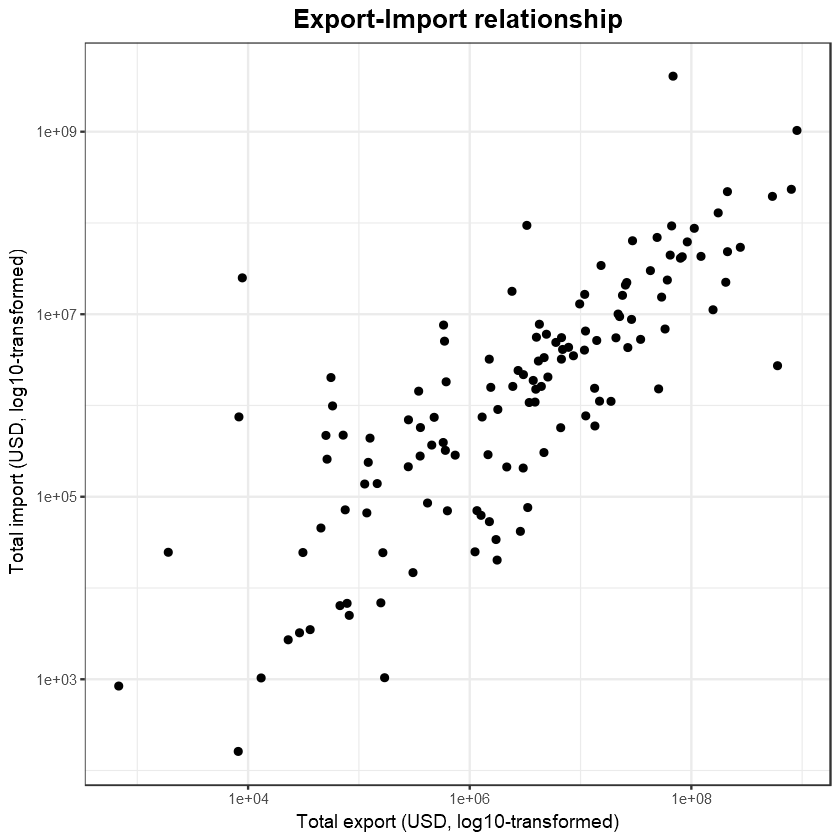

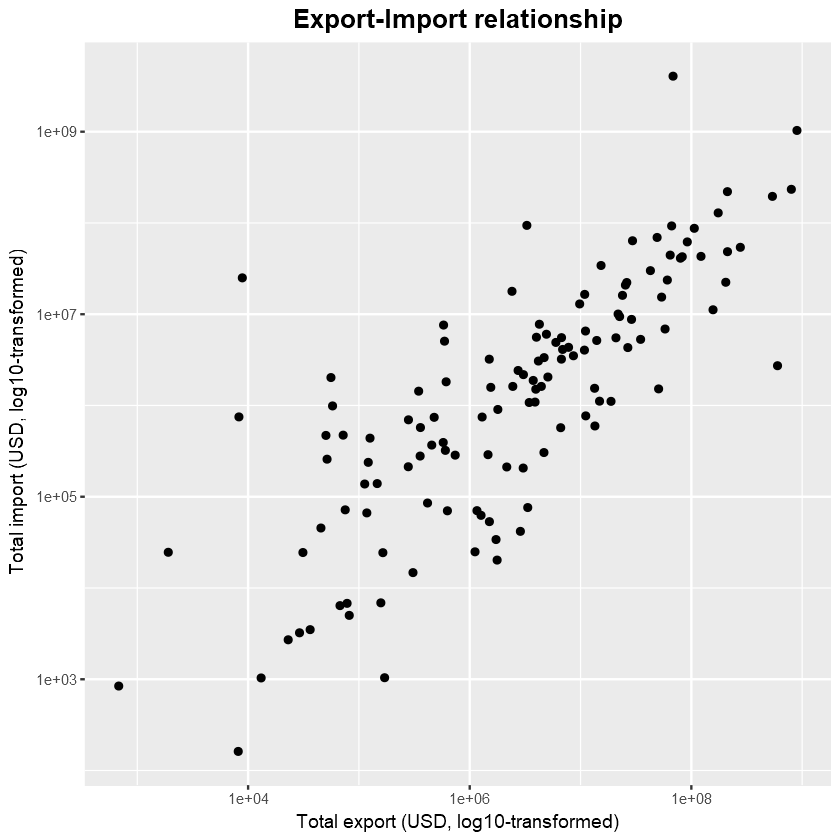

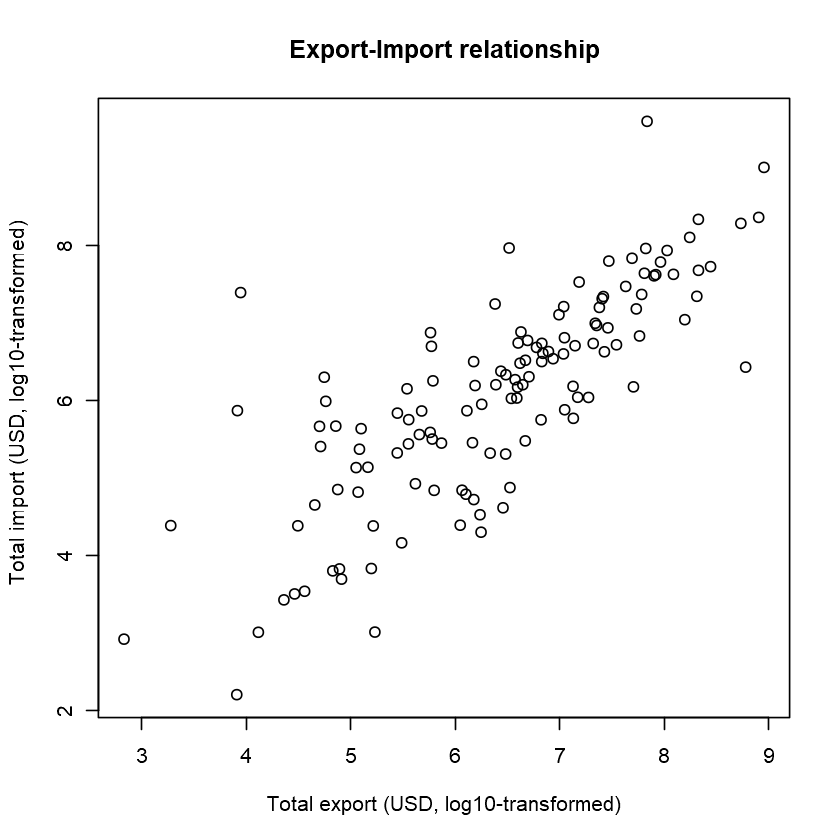

In [68]:
ggplot(data = pla_sc15,
       mapping = aes(x = Export,
                     y = Import)) +
    geom_point() +
    scale_x_continuous(trans = 'log10') + 
    scale_y_continuous(trans = 'log10') +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5,
                                    face = 'bold',
                                    size = 15)) +
    xlab('Total export (USD, log10-transformed)') +
    ylab('Total import (USD, log10-transformed)') +
    ggtitle('Export-Import relationship')

ggplot(data = pla_sc15,
       mapping = aes(x = Export,
                     y = Import)) +
    geom_point() +
    scale_x_continuous(trans = 'log10') + 
    scale_y_continuous(trans = 'log10') +
    #theme_bw() +
    theme(plot.title = element_text(hjust = 0.5,
                                    face = 'bold',
                                    size = 15)) +
    xlab('Total export (USD, log10-transformed)') +
    ylab('Total import (USD, log10-transformed)') +
    ggtitle('Export-Import relationship')


plot(x = log10(pla_sc15$Export), y = log10(pla_sc15$Import),
     xlab = 'Total export (USD, log10-transformed)',
     ylab = 'Total import (USD, log10-transformed)',
     main = 'Export-Import relationship')

### Some basic plots in `ggplot2`

Reporter,year,Export,Import,Re-Export,Re-Import,country,UNSR,Reporter2,Reporter1
CHN,2015,68387146,4062719308,NA,NA,China,Eastern Asia,CHN,CHN
HKG,2015,897606673,1032857642,875021393,NA,Hong Kong,Eastern Asia,HKG,HKG
IND,2015,3277501,94189170,NA,NA,India,Southern Asia,IND,IND
MYS,2015,91949915,62047559,NA,NA,Malaysia,South-eastern Asia,MYS,MYS
VNM,2015,64452606,44468489,NA,NA,Viet Nam,South-eastern Asia,VNM,VNM
IDN,2015,82776157,42685834,NA,NA,Indonesia,South-eastern Asia,IDN,IDN


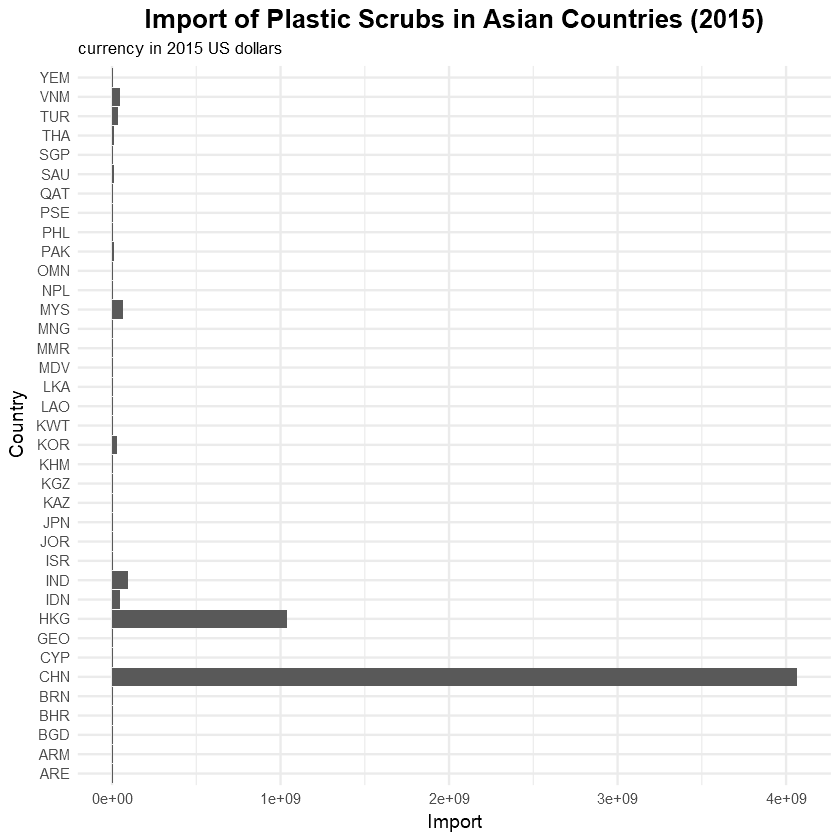

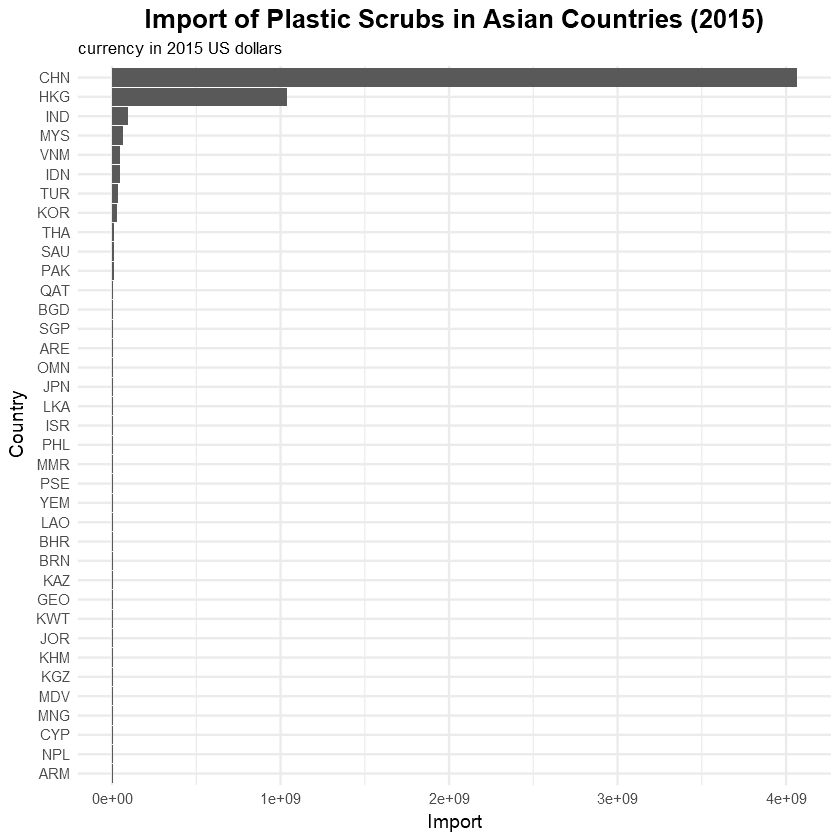

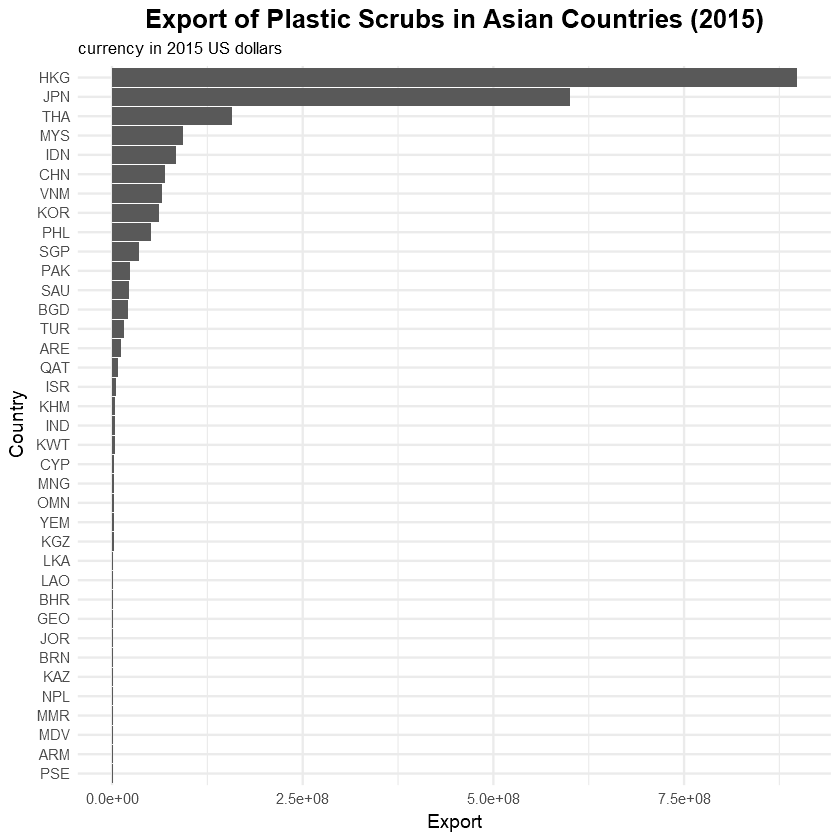

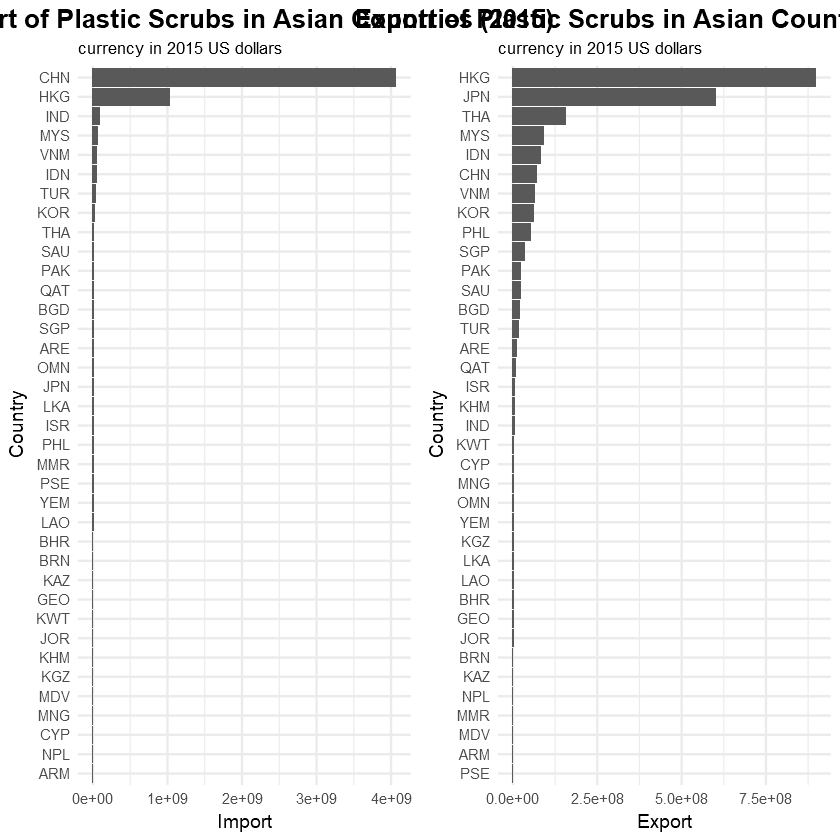

In [69]:
# !reorder factor
pla_sc15rf <- pla_sc15 %>%
    filter(grepl('*.(Asia)$', UNSR) & !is.na(Import) & !is.na(Export)) %>%
    mutate(Reporter2 = forcats::fct_reorder(.f = Reporter, .x = Import, .desc = FALSE, na.rm = TRUE),
           Reporter1 = forcats::fct_reorder(.f = Reporter, .x = Export, .desc = FALSE, na.rm = TRUE))
pla_sc15rf %>% arrange(-Import, -Export) %>% head

# Import
g1 <- ggplot(data = pla_sc15rf,
       mapping = aes(x = Reporter2,
                     y = Import)) +
    geom_bar(stat = 'identity') +
    coord_flip() +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5,
                                    face = 'bold',
                                    size = 15)) +
    xlab('Country') +
    ggtitle(label = 'Import of Plastic Scrubs in Asian Countries (2015)', subtitle = 'currency in 2015 US dollars')

g0 <- ggplot(data = pla_sc15rf,
       mapping = aes(x = Reporter,
                     y = Import)) +
    geom_bar(stat = 'identity') +
    coord_flip() +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5,
                                    face = 'bold',
                                    size = 15)) +
    xlab('Country') +
    ggtitle(label = 'Import of Plastic Scrubs in Asian Countries (2015)', subtitle = 'currency in 2015 US dollars')
g0


# Export
g2 <- ggplot(data = pla_sc15rf,
       mapping = aes(x = Reporter1,
                     y = Export)) +
    geom_bar(stat = 'identity') +
    coord_flip() +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5,
                                    face = 'bold',
                                    size = 15)) +
    xlab('Country') +
    ggtitle(label = 'Export of Plastic Scrubs in Asian Countries (2015)', subtitle = 'currency in 2015 US dollars')

g1
g2

# bonus: multi plots in a graph
library(gridExtra)
grid.arrange(g1, g2, ncol = 2)

### `geom_histogram`
+ 분포를 확인하는 데 이용되는 histogram을 `ggplot`으로 그릴 때는 `aes` 함수에서 `x`에 해당되는 변수만 mapping하면 됩니다.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 24 rows containing non-finite values (stat_bin)."

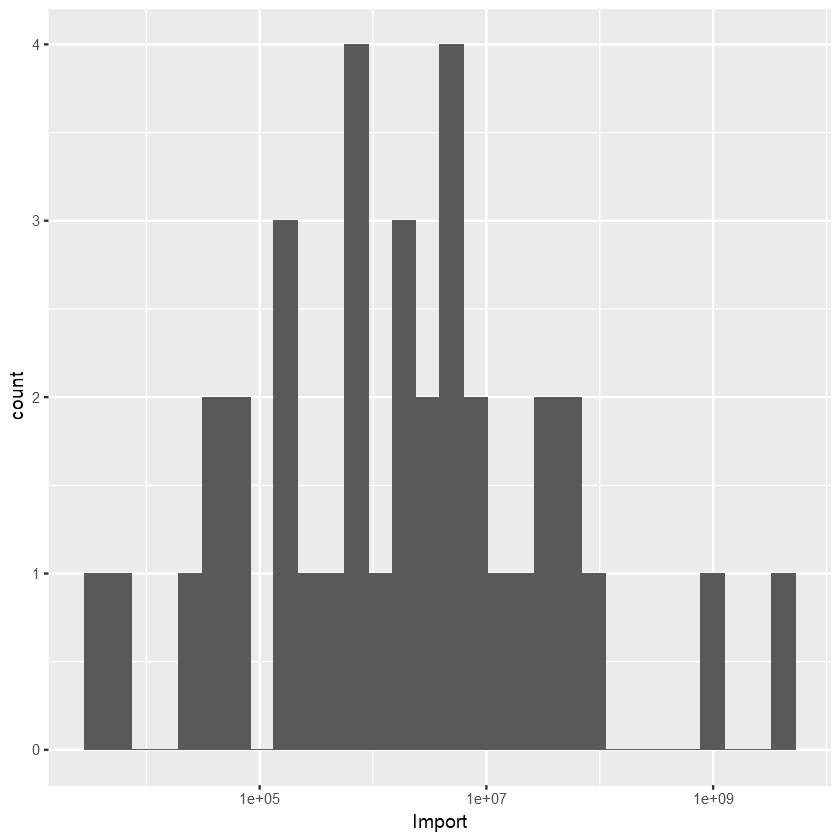

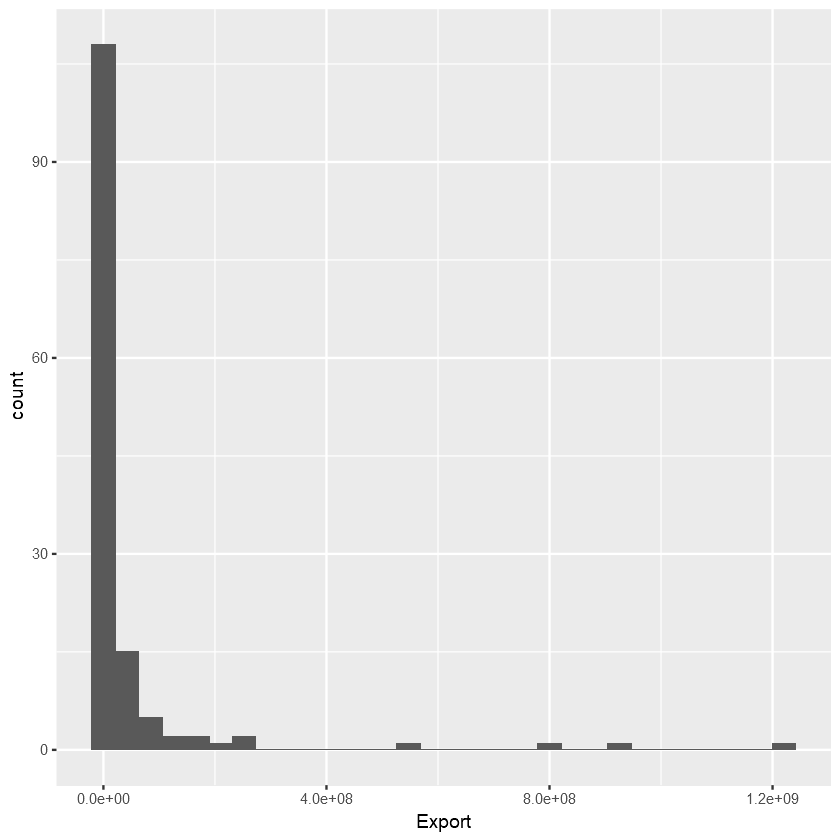

In [16]:
g3 <- ggplot(data = pla_sc15rf,
             mapping = aes(x = Import)) +
      scale_x_continuous(trans = 'log10') +
      geom_histogram()
g3


g4 <- ggplot(pla_sc %>% filter(year == 2010),
             mapping = aes(x = Export)) +
    geom_histogram()

g4

### `geom_path`
+ 점들을 연결합니다. `aes`의 `group` 인수가 이용되며, 값들의 순서가 의도에 맞아야 결과가 제대로 표시됩니다.
+ 값의 순서대로 정렬하는 함수가 기억나시나요?
+ 경제(학) 수업을 들은 적이 있다면, 물가상승률과 실업률의 관계를 연도별로 표시할 때 이러한 형태의 그래프를 한 번쯤은 보셨을 겁니다.
+ 아래 그림은 선택된 5개 국가에서 수입액과 수출액의 변화를 `geom_path`로 나타낸 것입니다.
    + 위에서 보지 못했던 `aes`의 새로운 인수들이 등장합니다. 바로 `group`과 `color`입니다. 이 그림을 위해서 우리는 'long format'의 data.frame을 사용하고 있습니다. 국가라는 범주가 분명하므로, 우리는 `aes` 속에서 값들을 어떻게 묶고, 묶인 값들을 어떤 색상으로 표시할 것인지를 '국가'를 기준으로 지정했습니다. 
    + `geom_path`에서 범주로 묶인 점들을 연결하는 순서는 data.frame에서 값들이 어떻게 정렬되어 있는가에 따라서 결정됩니다. 첫 번째 꼭지에서 '의도에 맞아야' 한다는 표현을 되새겨 보십시오.
+ 부차적으로, `geom_text`와 `geom_label`의 차이에 주목하십시오.
    + `geom_text`가 단순히 문자열을 지정된 위치에 표시해 준다면, `geom_label`은 지정된 위치의 요소들이 구분되도록 배경의 도형 위에 문자열을 표시해 줍니다.
    + 깊이 다루지는 못하지만, `ggrepel` 패키지의 `geom_text_repel`과 `geom_label_repel`은 레이블에 줄표를 달아서 고밀도 점들의 정보를 쉽게 인식할 수 있도록 해 줍니다.

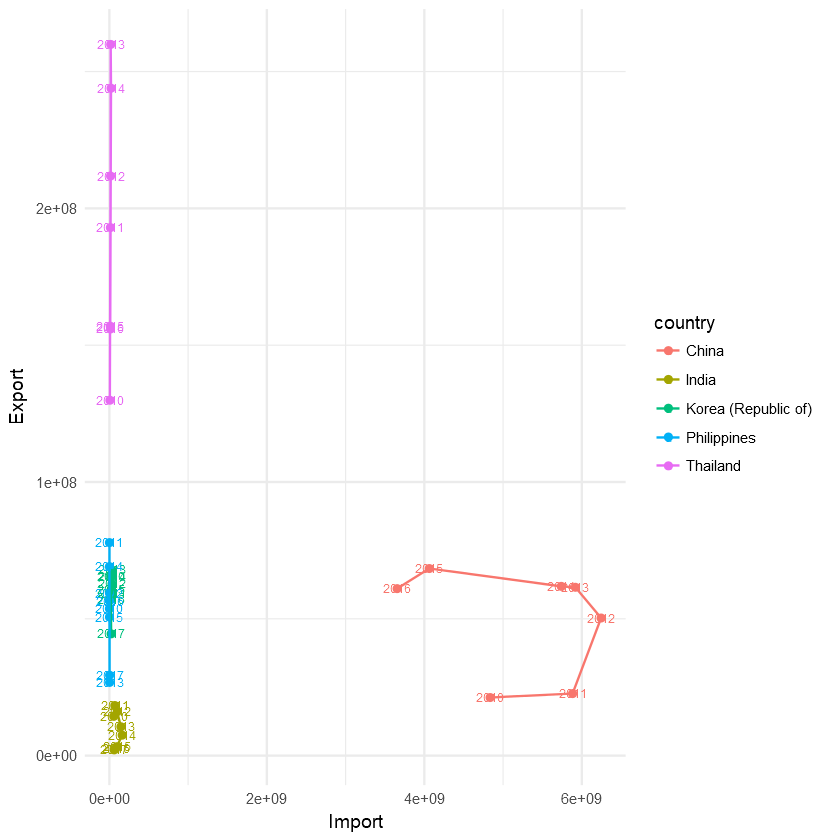

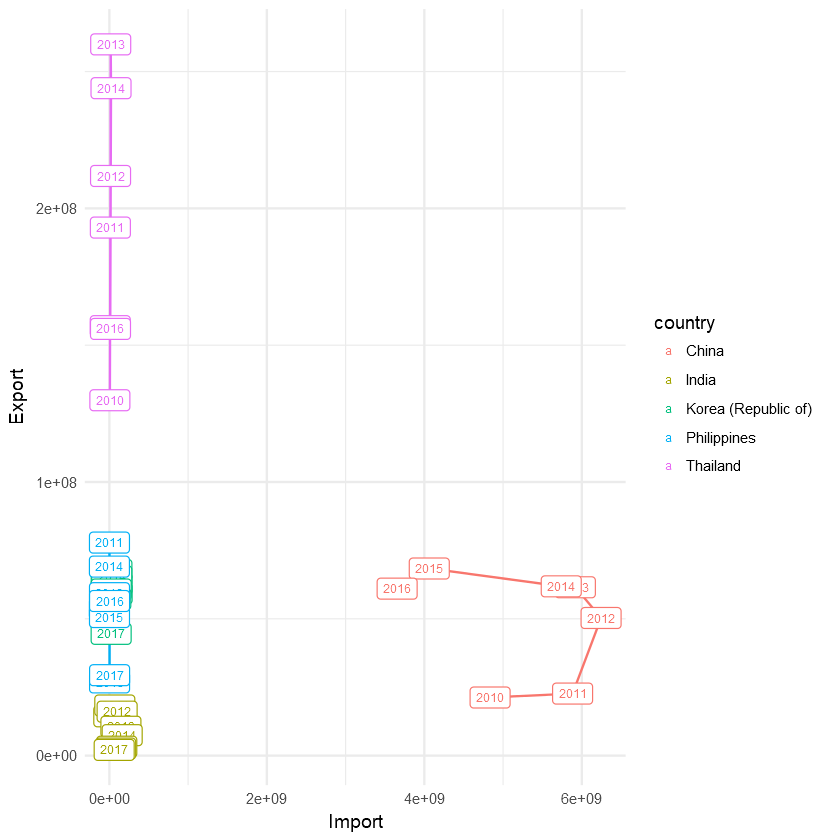

In [27]:
g5 <- ggplot(data = pla_sc %>% filter(Reporter %in% c('CHN', 'KOR', 'PHL', 'THA', 'IND')),
             mapping = aes(x = Import, y  = Export, group = country, color = country)) +
    geom_text(mapping = aes(x = Import, y = Export, label = year),
              size = 2.5) +
    geom_point() +
    geom_path() +
    theme_minimal()
g5
g5 + geom_label(mapping = aes(x = Import, y = Export, label = year),
                size = 2.5)

### `geom_line`과 시간 변수
+ 아래 그림은 `geom_line`을 이용해서 연도별 수출액을 선택된 몇 개 국가에 한해서 표시한 그림입니다.
+ 값들의 mapping 양상은 대체로 비슷합니다. 연도에 관한 정보가 있는 `year` 필드가 `integer(numeric)`이므로, 표시할 때 연도가 자동 정렬되었음을 알 수 있습니다.

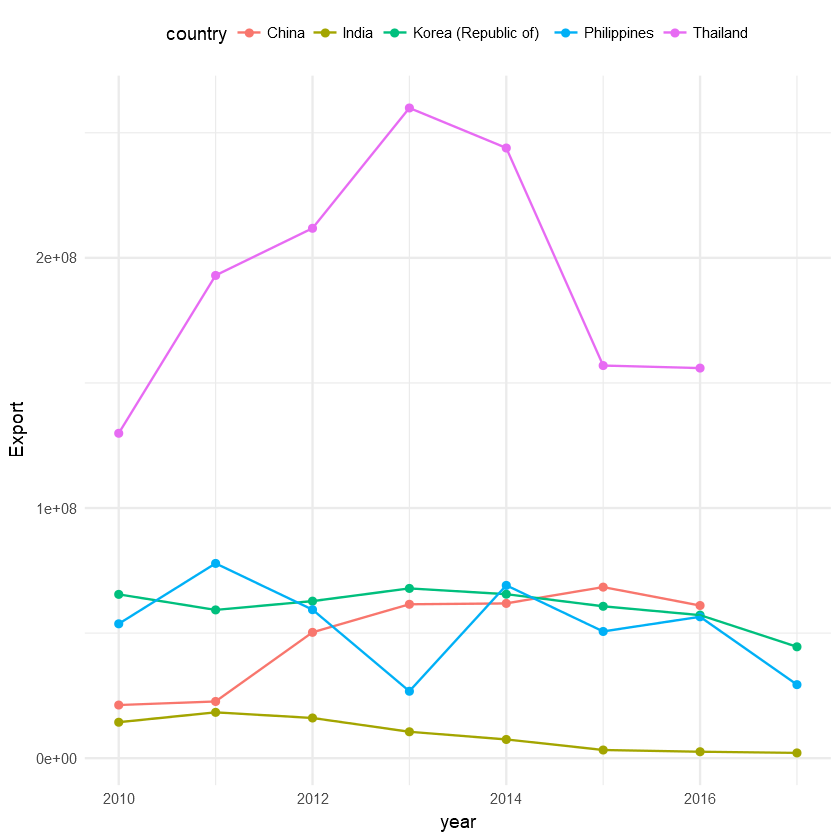

In [29]:
g6 <- ggplot(data = pla_sc %>% filter(Reporter %in% c('CHN', 'KOR', 'PHL', 'THA', 'IND')),
             mapping = aes(x = year, y  = Export, group = country, color = country)) +
    geom_point() +
    geom_line() +
    theme_minimal() +
    theme(legend.position = 'top')
g6

### 범주를 활용한 묶음 `geom_bar` 만들기
+ 우리는 이미 교역자료에서 수출/입에 관한 범주가 있다고 알고 있습니다.
+ 국가 별로 수출/입 형태별 교역액 규모가 어떠했는가를 표시하기 위해서 아래의 예시를 준비했습니다.
+ 물론 자료는 long format으로 다시 가공했습니다. 범주 필드가 `aes` 속에서 어떻게 mapping되고 있는지 주목하십시오.
+ 수출/입 범주인 `Flow` 필드를 이용해서 채울 색상(`fill`)과 `group`을 지정했습니다.
+ 병렬 표시된 bar chart를 완성하려면 `geom_bar`에 포함된 몇 가지 옵션을 지정해야 합니다.
    + `stat`: 주어진 값을 어떻게 요약할 것인가에 대한 인수이며, 여기에서는 개별 값을 보존하기 위해서 `'identity'` 값을 주었습니다. 한 범주에 속하는 값들이 여러 개인 경우(다음 장에서 살펴봅니다), 값을 요약하는 함수(예컨대 `'sum'`, `'median'`, `'mean'` 등)를 적용할 수 있습니다.
    + `position`: 이번 사례처럼 하위 범주가 존재하는 상황에서, 하위 범주를 어떻게 처리할 것인가에 대한 인수입니다. `'dodge'` 값은 하위 범주에 따라서 bar들을 서로 떨어뜨려 둔다는 의미입니다. 만약 특별한 값이 없다면, 두꺼운 하나의 bar가 다른 bar들을 뒤덮은 결과를 보게 됩니다.
+ 아래 코드 블록까지 포함해서 우리는 일곱 가지 `ggplot`의 핵심 요소들 중에서 하나를 제외한 여섯 가지에 관해서 살펴보았습니다.
    + __Data__
    + __Aesthetics__
    + __Geometries__
    + Facets
    + __Statistics__
    + __Coordinates__
    + __Theme__

Warning message:
"Removed 69 rows containing missing values (geom_bar)."

Warning message:
"Removed 69 rows containing missing values (geom_bar)."

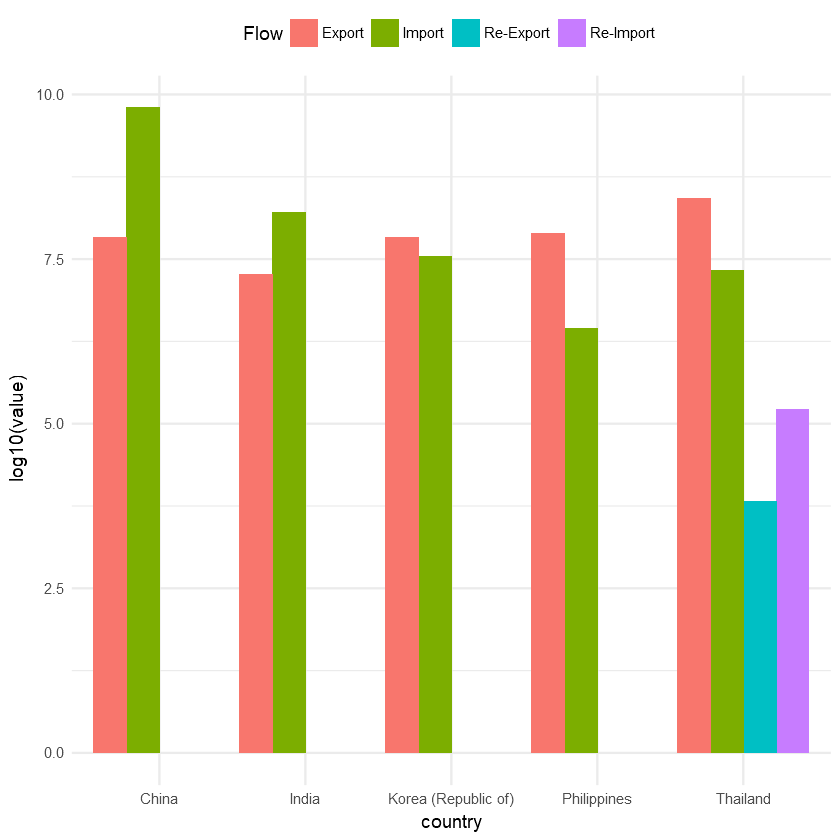

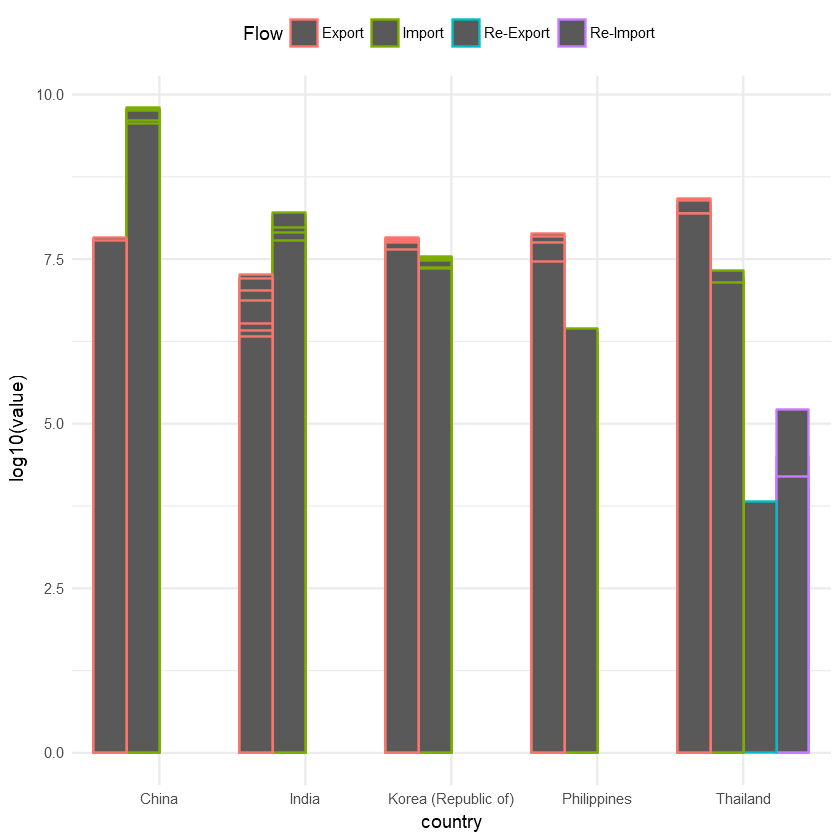

In [70]:
pla_sc_sub5 <- pla_sc %>% 
    filter(Reporter %in% c('CHN', 'KOR', 'PHL', 'THA', 'IND')) %>%
    gather(key = Flow, value = value, 3:6)

g7 <- ggplot(data = pla_sc_sub5,
             mapping = aes(x = country, y = log10(value), group = Flow, fill = Flow)) +
    geom_bar(stat = 'identity',
             position = 'dodge') +
    theme_minimal() +
    theme(legend.position = 'top')
g7

g7.1 <- ggplot(data = pla_sc_sub5,
             mapping = aes(x = country, y = log10(value), group = Flow, colour = Flow)) +
    geom_bar(stat = 'identity',
             position = 'dodge') +
    theme_minimal() +
    theme(legend.position = 'top')
g7.1

In [30]:
pla_sc %>% head

Reporter,year,Export,Import,Re-Export,Re-Import,country,UNSR
ABW,2010,NA,1531,NA,NA,Aruba,Caribbean
ABW,2011,NA,17,NA,NA,Aruba,Caribbean
ABW,2012,NA,187,NA,NA,Aruba,Caribbean
ABW,2013,NA,11,NA,NA,Aruba,Caribbean
ABW,2016,NA,55,NA,NA,Aruba,Caribbean
AGO,2010,NA,196373,NA,NA,Angola,Middle Africa


## 3. Road to multidimensional visualization: use `factor`
<img src="https://images.pexels.com/photos/246203/pexels-photo-246203.jpeg?cs=srgb&dl=candy-candy-store-246203.jpg&fm=jpg" width="400">

+ 앞선 장에서는 `ggplot`의 기본적 인터페이스와 여러 레이어들의 구성법을 알아보았습니다. 
+ 이번 장에서는 `facet` 관련 기능들을 이용해 범주들이 시각화 요소들을 분할하는 방법들을 관찰하면서, 적용하는 방법을 익히게 됩니다.
+ 또한 이전 장에서 충분히 살펴보지 못했던 `stat` 관련 적용례들을 좀 더 살펴보게 됩니다.
+ 데이터 측면에서 시각화 요소들을 분할하여 표시하는 방법은 크게 두 가지로 나누어 볼 수 있습니다.
    + 분류 기준이 고정된 'long format'의 `data.frame`을 이용하는 경우
    + 'wide format'의 `data.frame`을 이용하는 경우

In [39]:
pla_sc_sub <- pla_sc %>% 
    gather(key = Flow, value = value, 3:6)
pla_sc_sub %>% head

Reporter,year,country,UNSR,Flow,value
ABW,2010,Aruba,Caribbean,Export,NA
ABW,2011,Aruba,Caribbean,Export,NA
ABW,2012,Aruba,Caribbean,Export,NA
ABW,2013,Aruba,Caribbean,Export,NA
ABW,2016,Aruba,Caribbean,Export,NA
AGO,2010,Angola,Middle Africa,Export,NA


### Face `facets`
+ `facet_*` 함수는 `ggplot2` 패키지의 일곱 가지 기본 요소 가운데 아직 우리가 다루지 않았던 `facets` 관련 기능을 제공합니다.
+ `facets`란, 시각화 요소를 범주에 따라서 하위 그림(subplot)에 배열하는 것 또는 그러한 배열을 말합니다. 보통 `panel`이라고도 말합니다. (*주의: 경시적 자료를 의미하는 panel과 다릅니다*)
+ `facet_*` 함수는 크게 두 가지로 나뉩니다.
    + `facet_wrap`: 비구조화된 `facets` 구성 시 사용하는 함수입니다.
    + `facet_grid`: 구조화된 `facets` 구성 시 사용하는 함수입니다.
+ `facet_*` 함수에서 범주가 포함된 변수들을 활용하기 위해서는 `formula` format에 대한 이해가 필요합니다.
    + 수식은 `~` 기호를 기준으로 왼쪽에 y축에 배열될 범주 변수를, 오른쪽에 x축에 배열될 범주 변수들을 넣어 작성합니다.
    + 만약 어느 축에 대해서든 두 가지 이상의 범주들을 대응시켜 `facet`을 구성하고 싶다면, 두 변수를 `*` 기호로 연결합니다.

+ UN의 공식 지역군 구분은 22가지입니다. 아래 예시는 22개 지역군에 따라서 2016년 폐플라스틱 수출액의 분포를 표시하였습니다.
+ 그 아래 그림에서는 지역별로 상이한 값 범위 문제를 해결하기 위해서 `facet` 별로 다른 scale을 적용합니다.
    + `facet_*` 함수에서 `scale`에 관한 옵션은 크게 세 가지입니다.
        + `free`: 모든 축에 각 패널에 포함되는 값들의 정보를 반영해서 범위를 조절합니다.
        + `free_x`, `free_y`: x축 또는 y축의 범위를 패널 별로 자동 적용하도록 합니다.
+ 다시 그 아래 그림에서는 더 세부적인 시각요소들을 조정했습니다.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 12 rows containing non-finite values (stat_bin)."

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 12 rows containing non-finite values (stat_bin)."

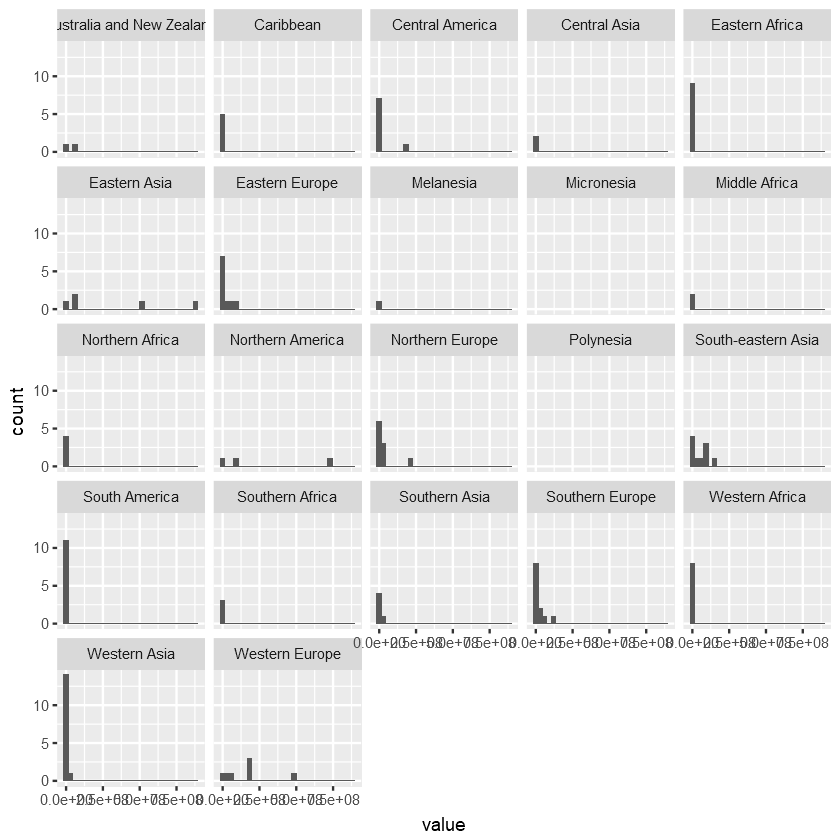

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 12 rows containing non-finite values (stat_bin)."

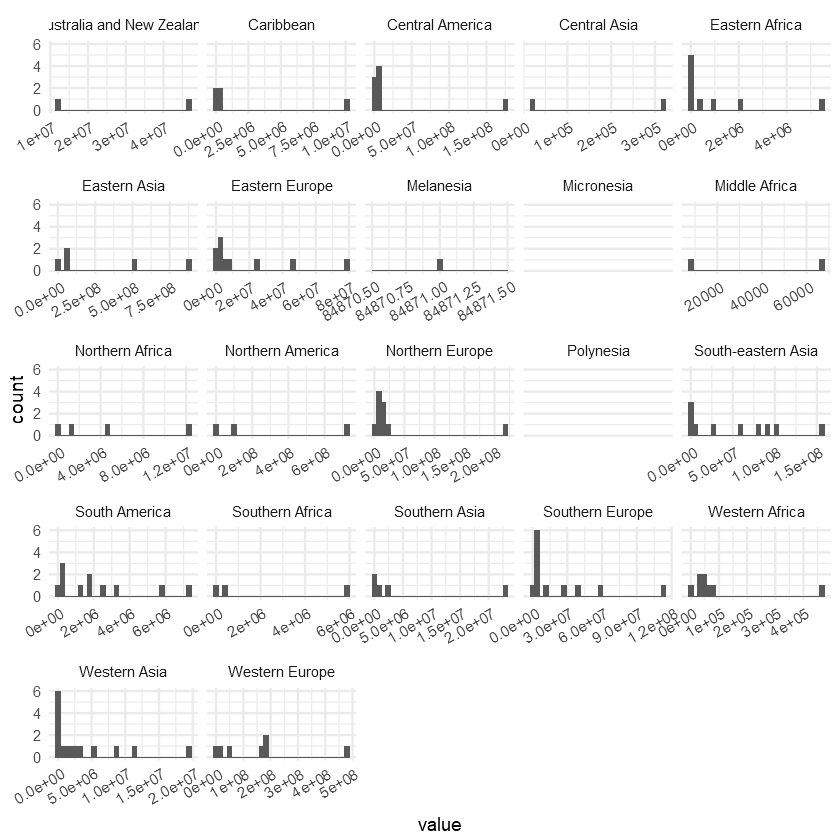

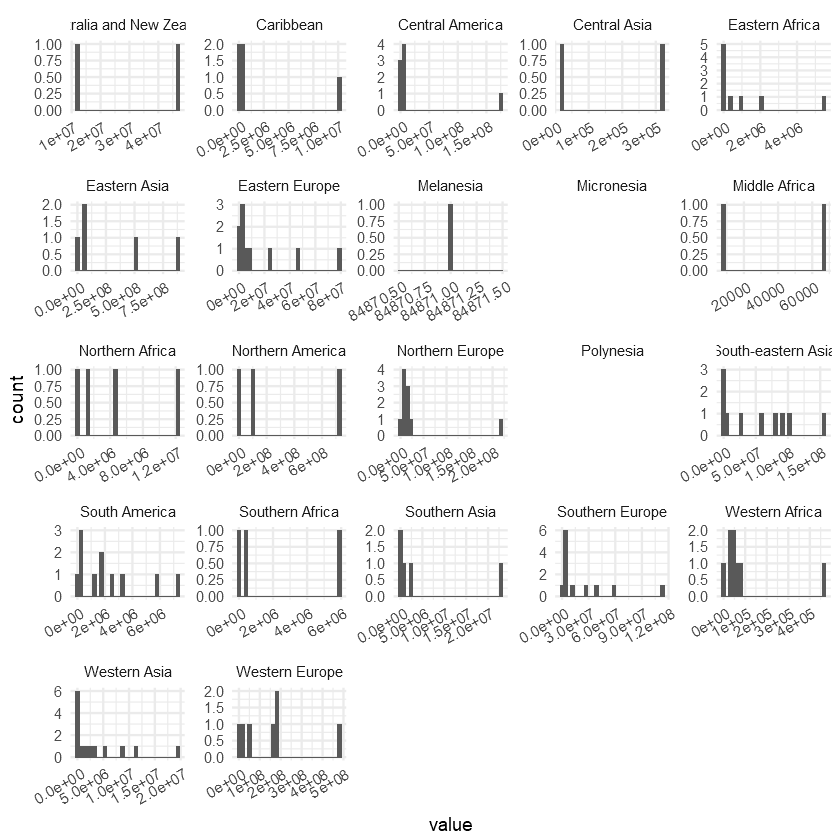

In [42]:
g8 <- ggplot(data = pla_sc_sub %>% filter(year == 2016 & Flow == 'Export'),
             mapping = aes(x = value)) +
    geom_histogram() +
    facet_wrap(~UNSR)
g8

g9 <- ggplot(data = pla_sc_sub %>% filter(year == 2016 & Flow == 'Export'),
             mapping = aes(x = value)) +
    geom_histogram() +
    facet_wrap(~UNSR, scale = 'free_x') +
    theme_minimal() +
    theme(axis.text.x = element_text(hjust = 1, angle = 30))
g9 

g10 <- ggplot(data = pla_sc_sub %>% filter(year == 2016 & Flow == 'Export'),
             mapping = aes(x = value)) +
    geom_histogram() +
    facet_wrap(~UNSR, scale = 'free') +
    theme_minimal() +
    theme(axis.text.x = element_text(hjust = 1, angle = 30))
g10 

+ 아래는 `facet_grid`의 적용례입니다.
+ 대상연도는 2016년이며, y축 방향으로 UN의 22개 지역구분을, x축 방향으로 (재)수출/입 범주를 배열했습니다.
+ 자료 시각화 방법은 `histogram`입니다. `facet_grid`는 `facet_wrap`에 비해 높은 수준으로 범주를 구조화하는 방법이므로, `scale`에 `free`를 입력했음에도 `facet_wrap`에서처럼 각 `facet`에서 `scale` 조정이 세부적으로 적용되지 않았음을 볼 수 있습니다.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 279 rows containing non-finite values (stat_bin)."

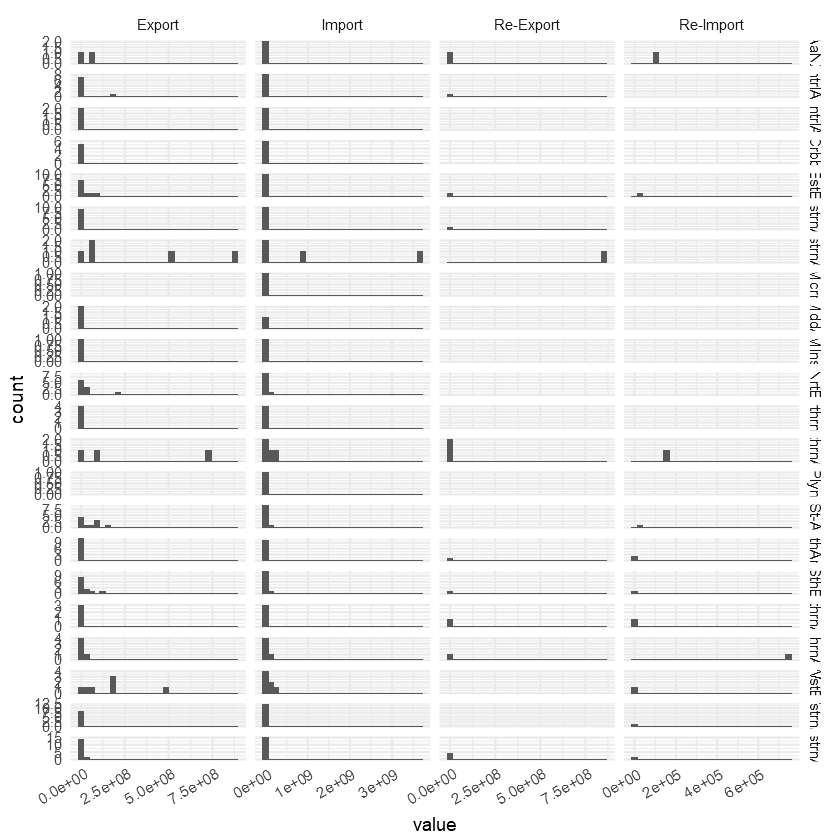

In [45]:

g11 <- ggplot(data = pla_sc_sub %>% mutate(UNSRAbbr = abbreviate(UNSR)) %>% filter(year == 2016),
             mapping = aes(x = value)) +
    geom_histogram() +
    facet_grid(UNSRAbbr ~ Flow, scale = 'free') +
    theme_minimal() +
    theme(axis.text.x = element_text(hjust = 1, angle = 30))
g11 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 279 rows containing non-finite values (stat_bin)."

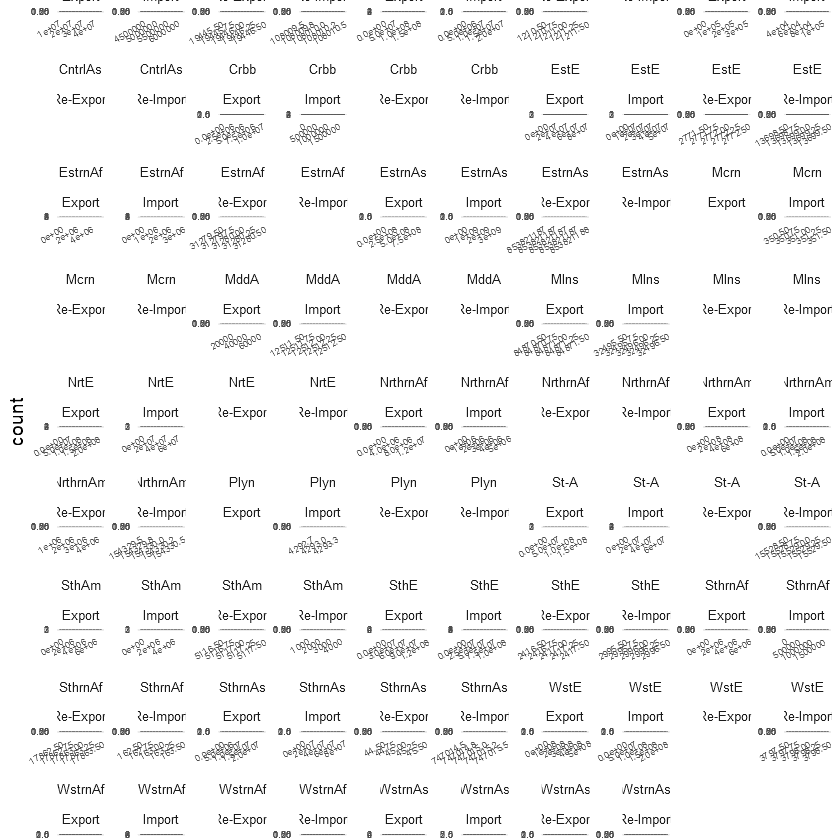

In [66]:
g12 <- ggplot(data = pla_sc_sub %>% mutate(UNSRAbbr = abbreviate(UNSR)) %>% filter(year == 2016),
             mapping = aes(x = value)) +
    geom_histogram() +
    facet_wrap(UNSRAbbr ~ Flow, scale = 'free') +
    theme_minimal() +
    theme(axis.text = element_text(size = 5),
          strip.text = element_text(size = 7.5),
          axis.text.x = element_text(hjust = 1, angle = 30))
g12 

Warning message:
"Removed 177 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 177 rows containing missing values (geom_point)."

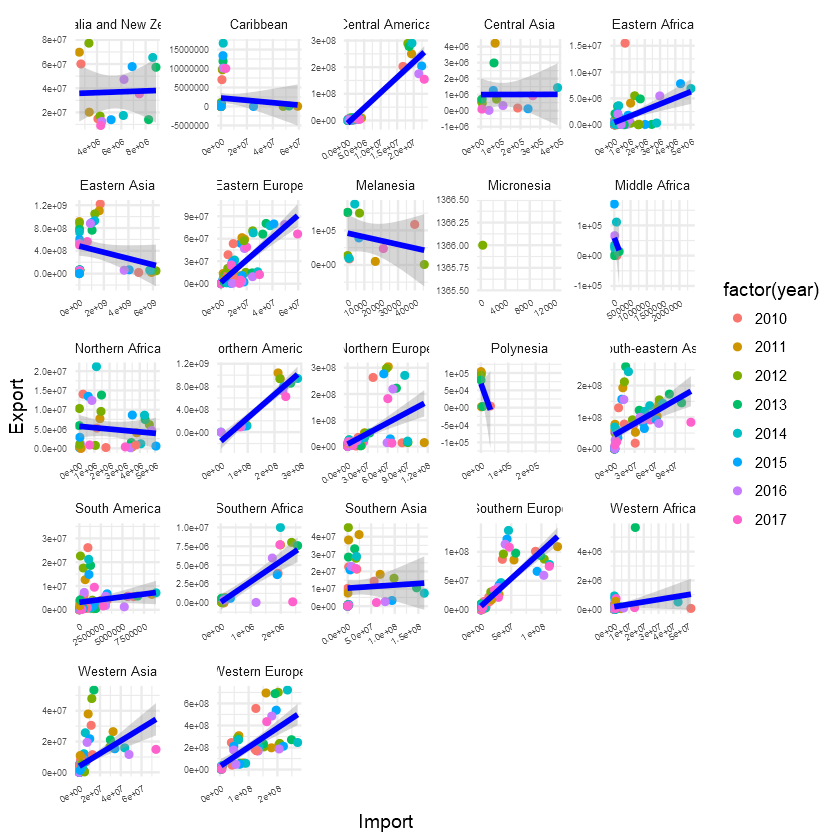

In [50]:
g13 <- ggplot(data = pla_sc,
             mapping = aes(x = Import, y = Export, color = factor(year))) +
    geom_point() +
    geom_smooth(color = 'blue', method = 'lm', lwd = 1.2) +
    facet_wrap(~ UNSR, scale = 'free') +
    theme_minimal() +
    theme(axis.text = element_text(size = 5),
          axis.text.x = element_text(hjust = 1, angle = 30),
          strip.text = element_text(size = 7.5))
g13 

### wide format data.frame 이용 시
+ wide format의 `data.frame`을 이용하면 아래 `g14`를 생성하는 예시에서처럼 `layer`의 적층으로 이루어지는 `ggplot`의 원리를 보다 쉽게 이해할 수 있다는 장점이 있습니다.
+ 다만 아래 그림에서 수출은 실선, 수입은 점선으로 표시하도록 설정했으나 범례에서는 해당 내용이 반영되지 않았습니다. 이 때에는 범례에 관한 설정을 따로 해 주어야 하는데 그 과정이 매우 복잡하기 때문에, 되도록 long format으로 변경한 다음 시각화하는 것이 좋습니다.

In [52]:
pla_sc_sea <- pla_sc %>% 
    filter(grepl('^(South-).*.(Asia)$', UNSR))

Warning message:
"Removed 1 rows containing missing values (geom_point)."Warning message:
"Removed 1 rows containing missing values (geom_path)."

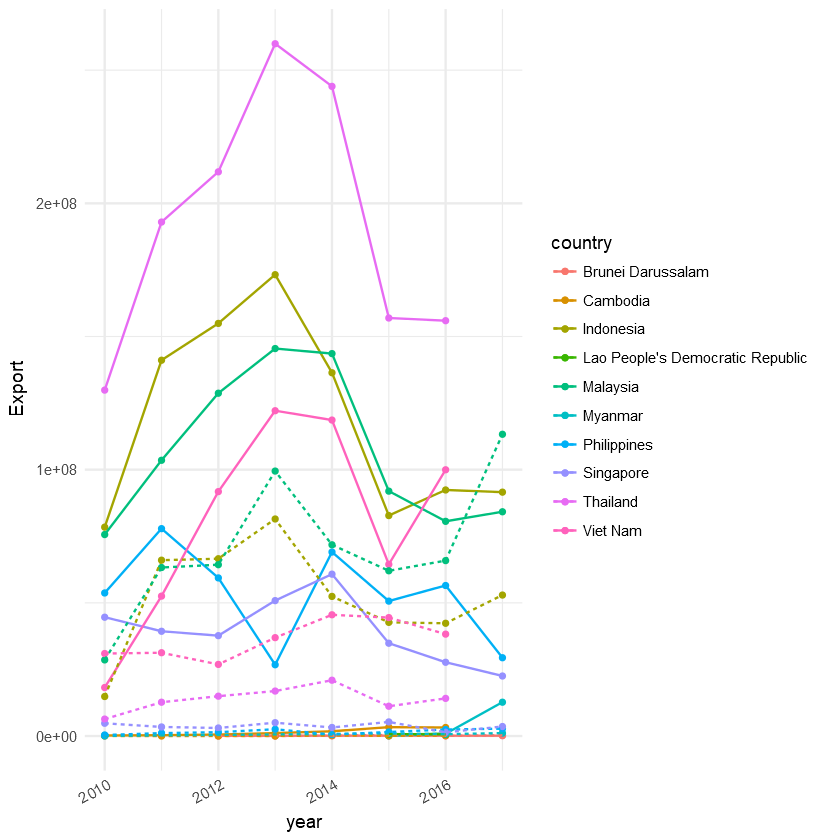

In [55]:
g14 <- ggplot(data = pla_sc_sea,
              mapping = aes(x = year, color = country)) +
    geom_point(mapping = aes(x = year, y = Export), size = 1) +
    geom_line(mapping = aes(x = year, y = Export)) +
    geom_point(mapping = aes(x = year, y = Import), size = 1, shape = 3) +
    geom_line(mapping = aes(x = year, y = Import), lty = 2) +
    theme_minimal() +
    theme(axis.text.x = element_text(hjust = 1, angle = 30),
          strip.text = element_text(size = 7.5))
g14

+ 아래 예시는 앞 예시에서 보였던 한계들을 극복하기 위해서 자료를 long format으로 정비한 후 세부 조정을 가한 결과입니다.
+ Flow에 따라서는 점의 모양과 선 종류를 달리하여 구분했습니다.
+ 특이한 점이라면 두 개 이상의 필드를 한 번에 반영해서 값들을 묶고자(grouping) `interaction`이라는 함수를 동원했다는 점입니다.
    + 색상은 국가별로만 비교하므로 `color = country`가 들어간 것은 당연하고,
    + 값을 묶는 기준은 `color`와 `Flow`의 두 가지가 있는데, 이들을 연결하여 반영하는 함수가 `interaction`입니다.
+ `guides` 함수는 그래프에 표시된 모든 도형, 선 등의 모양과 색상에 관한 범례를 조절하는 함수입니다. 여기서는 범례를 아래에 배치했는데, 아래와 같은 조정이 없으면 범례가 가로로 길기 때문에 상당한 분량이 잘려서 나오게 됩니다. 지금 당장은 이 복잡한 형태를 일일이 기억하려 애쓰지 않아도 됩니다. 다만 이러한 기능들이 있다는 것만 기억해 두어도 나중에 여러분이 필요로 하는 시각화 작업을 수행할 때에 노력을 줄일 수 있습니다.

Warning message:
"Removed 122 rows containing missing values (geom_point)."Warning message:
"Removed 21 rows containing missing values (geom_path)."

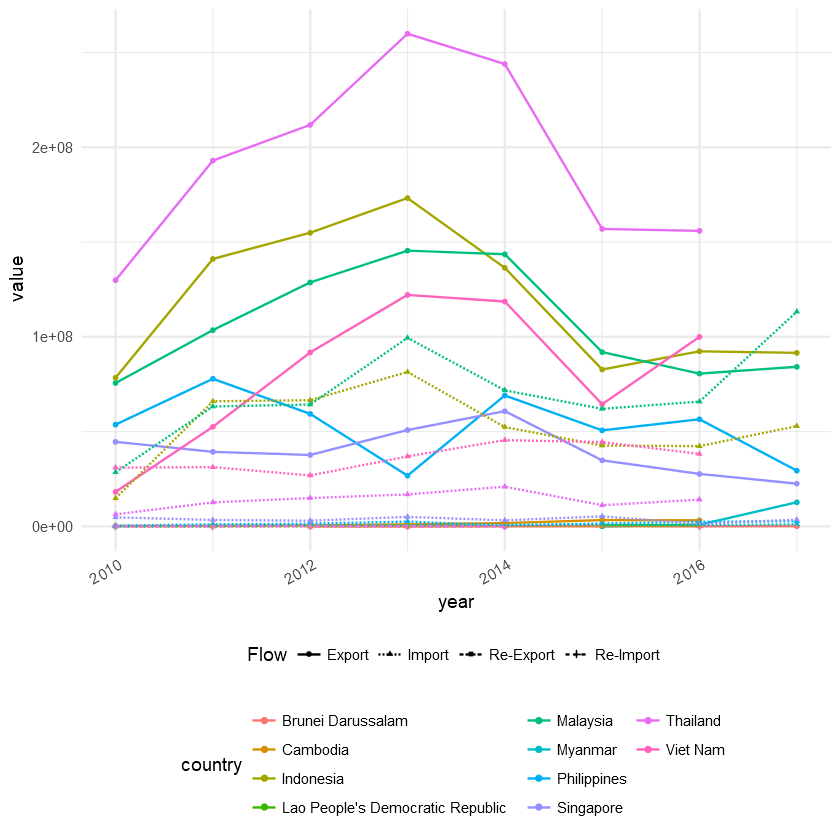

In [65]:
pla_sc_sea_l <- pla_sc_sea %>% gather(key = Flow, value = value, 3:6)
g15 <- ggplot(data = pla_sc_sea_l,
              mapping = aes(x = year, y = value, group = interaction(country, Flow), color = country)) +
    geom_point(mapping = aes(shape = Flow), size = 1) +
    geom_line(mapping = aes(linetype = Flow)) +
    theme_minimal() +
    theme(axis.text.x = element_text(hjust = 1, angle = 30),
          strip.text = element_text(size = 7.5),
          legend.position = 'bottom',
          legend.box = 'vertical') +
    guides(color = guide_legend(ncol = 3))
g15

### Additional features
+ `ggplot2`에서 제공하는 시각화 방법은 그야말로 무궁무진합니다. 특히 최근 2~3년 간 많은 기능이 추가되었고, 우리의 시각화 생활은 훨씬 윤택해졌습니다.
+ 일반적인 시각화 기능과 관련해서는 `geom_bin`, `geom_hex`, `geom_pointrange`, `geom_rug`, `geom_violin` 등을 살펴보십시오.
+ 더 감각적인 색상을 원한다면 색상과 관련된 패키지들, `viridis`, `RColorBrewer` 등을 참고하시고, `ggthemes` 패키지를 설치하여 추가 색상 팔레트를 이용해 보면 됩니다.
+ 이번 주에 미진했던 부분은 다음 주 '지리적 정보 시각화' 시간 일부를 할애해서 좀 더 자세하게 다루도록 하겠습니다.

## Assignment
1. 본문에서 다룬 아래 그림에서 지역권이 너무 다양하여 색상의 구분 효과가 거의 없습니다. 자료를 이용해서 22개 지역권을 '충분히 작은 수'로 줄이십시오. 그 후 코드를 자료에 맞게 수정하여 결과를 표시해 보십시오. 그리고 그 과정과 결과를 2분 이내로 소개하십시오.
    - Excel을 이용하지 말 것. `plyr::mapvalues` 항목을 참조하여 작업하십시오.
    - 지역권 자료는 제공된 리스트를 이용하여 조인한 후 사용하십시오.
2. 지난 주 assignment에서 생성했던 자료를 이용해서, 아래의 내용을 `ggplot2`를 이용하여 시각화하십시오. 그 과정을 3분 이내로 소개하십시오.
    - 2.1. 선택한 교역품에 대해서, 대한민국의 수출 기준 5대 무역국을 찾고, 5대 무역국에 대한 수출, 수입, 재수출, 재수입 액수를 grouped bar plot으로 표시하시오.
    - 2.2. `geom_point`와 `geom_smooth`를 이용해서 지역권 별로 수출과 수입의 관계를 시각화하고 패턴을 간략히 설명하십시오.
        - 지역권 자료는 제공된 리스트를 이용하여 조인한 후 사용하십시오.

In [ ]:

# to add graphical element
plot(x = log10(pla_sc15$Export), y = log10(pla_sc15$Import),
     xlab = 'Total export (USD, log10-transformed)',
     ylab = 'Total import (USD, log10-transformed)',
     main = 'Export-Import relationship',
     col = factor(pla_sc15$UNSR),
     xlim = c(2, 9.5), 
     ylim = c(2, 9.5))
abline(a = 0, b = 1, col = 'red', lwd = 2)

text(x = 4.8, y = 8.8, cex = 0.8, labels = 'Import dominant', col = 'blue')
text(x = 8.3, y = 4.2, cex = 0.8, labels = 'Export dominant', col = 'blue')
arrows(x0 = 5, y0 = 8, x1 = 4.5, y1 = 8.5, col = 'blue', length = 0.1, lwd = 3)
arrows(x0 = 7.5, y0 = 5, x1 = 8, y1 = 4.5, col = 'blue', length = 0.1, lwd = 3)

legend('topleft', 
       col = 1:22, 
       pch = 1,
       cex = 0.6,
       legend = levels(factor(pla_sc15$UNSR)))
legend('bottomright', col = 'red', lwd = 2, 
       legend = 'identity line', cex = 0.6)